In [1]:
import importlib
import time
import os
import pickle
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy import integrate
from scipy import interpolate
from scipy import optimize

In [2]:
from multi_loc import covariance, assimilate, utilities

In [3]:
%matplotlib inline

In [4]:
def imshow(X, title=None, vmin=None, vmax=None, cmap=None):
    plt.figure()
    im = plt.imshow(X, vmin=vmin, vmax=vmax, cmap=cmap)
    plt.colorbar(im)
    plt.title(title)

In [5]:
# N_Z = 960
# K = 32
# I = 12
# F = float(15)
# b = float(10)
# # b = float(7)
# c = float(2.5)
# alpha = (3 * I**2 + 3) / (2 * I**3 + 4 * I)
# beta = (2 * I**2 + 1) / (I**4 + 2 * I**2)

# coarse = 8
# N_Xc = N_Z//coarse
# K_c = K//coarse

# N_eZ = 100
save_dir = 'LM3_error_growth_cycle2'
home = os.path.expanduser('~')
save_dir = os.path.join(
    home,
    'Documents/python_code/multi_loc/notebooks/',
    save_dir)


# dt_rk = 0.05/12

# T_ic = (120)/5

# T_cycle = 8
# N_cycle = 500

# T_gt = T_cycle*N_cycle

# if not os.path.exists(save_dir):
#     os.mkdir(save_dir)
this_path = os.path.join(save_dir, 't_gt.npy')
# if load_data:
t_gt = np.load(this_path)

In [6]:
# this_path = os.path.join(save_dir, 'Z_GT.npy')
# if load_data:
#     Z_GT = np.load(this_path)
# else:
#     X_interp = np.random.uniform(low=-5, high=10, size=N_Z//K)
#     X_interp = np.concatenate([X_interp, [X_interp[0]]])
#     x = np.arange(N_Z)
#     x_interp = x[::K]
#     x_interp = np.concatenate([x_interp, [x[-1] + 1]])
#     f_X = interpolate.interp1d(x_interp, X_interp, kind='quadratic')
#     X0 = f_X(x)
#     Y0 = np.random.uniform(low=-0.5, high=1, size=N_Z)
#     Z0 = X0 + X0*Y0/X0.max()
#     Z = utilities.return_LM3_data(Z0, dt_rk, T_ic, dt_rk, K=K, I=I, F=F, b=b, c=c)
#     Z0 = Z[:, -1]
#     Z_GT = utilities.return_LM3_data(
#         Z0, dt_rk, T_gt, dt_rk, K=K, I=I, F=F, b=b, c=c)
#     np.save(this_path, Z_GT)

In [7]:
# X_GT = utilities.window_sum_Z(Z_GT, I=I, alpha=alpha, beta=beta)
# Y_GT = Z_GT - X_GT

In [8]:
# Pert_var = 1e-10

# # Error in X only
# rho0 = 0.15
# [Pert_cor] = covariance.generate_circulant(
#     N_Z, dx=1/N_Z, rho0=rho0,
#     correlation_fun=covariance.fft_sqd_exp_1d,
#     return_Corr=True, return_eig=False)
# Pert = Pert_var * Pert_cor
# cycle_dir = os.path.join(save_dir, 'correlated')
# if not os.path.exists(cycle_dir):
#         os.mkdir(cycle_dir)

# # # Error in Y only
# # Pert = Pert_var * np.eye(N_Z)
# # cycle_dir = os.path.join(save_dir, 'identity')
# # if not os.path.exists(cycle_dir):
# #         os.mkdir(cycle_dir)

In [9]:
# Z_ave_rmse = np.ones([N_cycle, int(T_cycle/dt_rk + 1)]) * np.nan
# X_ave_rmse = Z_ave_rmse.copy()
# Y_ave_rmse = Z_ave_rmse.copy()

# for n_cycle in range(N_cycle):
#     print(n_cycle)
#     start = np.abs(t_gt - T_cycle * n_cycle).argmin()
#     stop = np.abs(t_gt - T_cycle *(n_cycle + 1)).argmin()
#     slice_cycle = slice(start, stop + 1)
#     print(t_gt[start])
#     print(t_gt[stop])
#     print()
    
#     Zpert = np.random.multivariate_normal(Z_GT[:, start], Pert, N_eZ).T
#     Xpert = utilities.window_sum_Z(Zpert, I=I, alpha=alpha, beta=beta)
#     Ypert = Zpert - Xpert
#     Zpert = X_GT[:, start][:, None] + Ypert
    
#     Zpert_ts = utilities.return_LM3_ens_data(Zpert, dt=dt_rk, T=T_cycle, dt_obs=dt_rk)
#     Xpert_ts = Zpert_ts * np.nan
#     for count in range(Zpert_ts.shape[-1]):
#         Xpert_ts[:, :, count] = utilities.window_sum_Z(
#             Zpert_ts[:, :, count], I=I, alpha=alpha, beta=beta)
#     Ypert_ts = Zpert_ts - Xpert_ts
    
#     Z_error = Zpert_ts - Z_GT[:, None, slice_cycle]
#     X_error = Xpert_ts - X_GT[:, None, slice_cycle]
#     Y_error = Ypert_ts - Y_GT[:, None, slice_cycle]
    
#     Z_rmse = np.sqrt((Z_error**2).mean(axis=0))
#     Z_ave_rmse[n_cycle] = Z_rmse.mean(axis=0)

#     X_rmse = np.sqrt((X_error**2).mean(axis=0))
#     X_ave_rmse[n_cycle] = X_rmse.mean(axis=0)

#     Y_rmse = np.sqrt((Y_error**2).mean(axis=0))
#     Y_ave_rmse[n_cycle] = Y_rmse.mean(axis=0)
    
#     this_dir = os.path.join(cycle_dir, f'{n_cycle:04}')
#     if not os.path.exists(this_dir):
#         os.mkdir(this_dir)
        
#     this_path = os.path.join(this_dir, 'Z_rmse.npy')
#     np.save(this_path, Z_rmse)
    
#     this_path = os.path.join(this_dir, 'X_rmse.npy')
#     np.save(this_path, X_rmse)
    
#     this_path = os.path.join(this_dir, 'Y_rmse.npy')
#     np.save(this_path, Y_rmse)
# this_path = os.path.join(cycle_dir, 'Z_ave_rmse.npy')
# np.save(this_path, Z_ave_rmse)
# this_path = os.path.join(cycle_dir, 'X_ave_rmse.npy')
# np.save(this_path, X_ave_rmse)
# this_path = os.path.join(cycle_dir, 'Y_ave_rmse.npy')
# np.save(this_path, Y_ave_rmse)

In [10]:
cycle_dir = os.path.join(save_dir, 'identity')

this_path = os.path.join(cycle_dir, 'Z_ave_rmse.npy')
Z_ave_rmse_I = np.load(this_path)

this_path = os.path.join(cycle_dir, 'X_ave_rmse.npy')
X_ave_rmse_I = np.load(this_path)

this_path = os.path.join(cycle_dir, 'Y_ave_rmse.npy')
Y_ave_rmse_I = np.load(this_path)

cycle_dir = os.path.join(save_dir, 'correlated')

this_path = os.path.join(cycle_dir, 'Z_ave_rmse.npy')
Z_ave_rmse_C = np.load(this_path)

this_path = os.path.join(cycle_dir, 'X_ave_rmse.npy')
X_ave_rmse_C = np.load(this_path)

this_path = os.path.join(cycle_dir, 'Y_ave_rmse.npy')
Y_ave_rmse_C = np.load(this_path)

In [11]:
Zc_ave_rmse_I = Z_ave_rmse_I.mean(axis=0)
Xc_ave_rmse_I = X_ave_rmse_I.mean(axis=0)
Yc_ave_rmse_I = Y_ave_rmse_I.mean(axis=0)

Zc_ave_rmse_C = Z_ave_rmse_C.mean(axis=0)
Xc_ave_rmse_C = X_ave_rmse_C.mean(axis=0)
Yc_ave_rmse_C = Y_ave_rmse_C.mean(axis=0)

In [12]:
%matplotlib inline

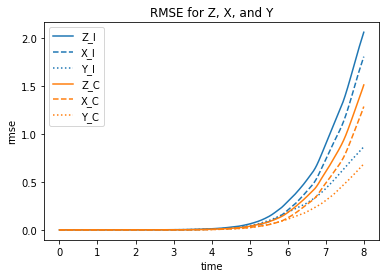

In [13]:
time = 8
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.plot(t_gt[:this_index], Zc_ave_rmse_I[:this_index], linestyle='-', color='C0')
plt.plot(t_gt[:this_index], Xc_ave_rmse_I[:this_index], linestyle='--', color='C0')
plt.plot(t_gt[:this_index], Yc_ave_rmse_I[:this_index], linestyle=':', color='C0')
plt.plot(t_gt[:this_index], Zc_ave_rmse_C[:this_index], linestyle='-', color='C1')
plt.plot(t_gt[:this_index], Xc_ave_rmse_C[:this_index], linestyle='--', color='C1')
plt.plot(t_gt[:this_index], Yc_ave_rmse_C[:this_index], linestyle=':', color='C1')
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z_I', 'X_I', 'Y_I',
            'Z_C', 'X_C', 'Y_C'])

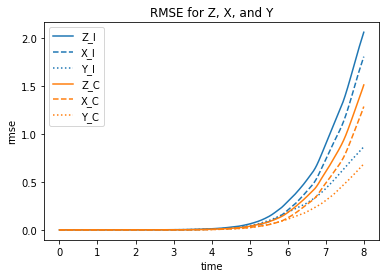

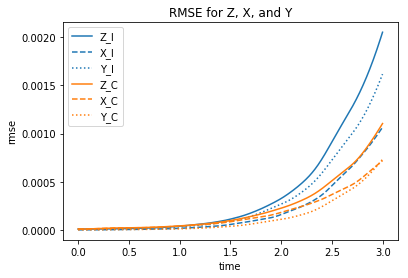

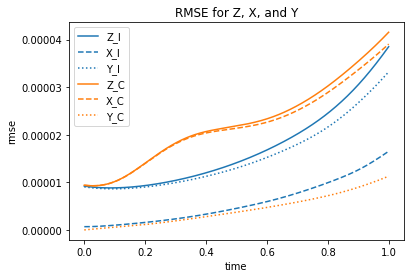

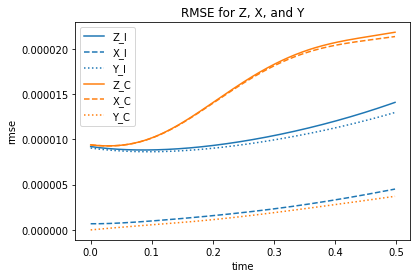

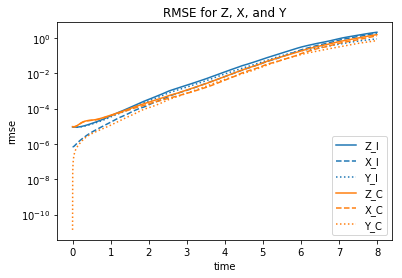

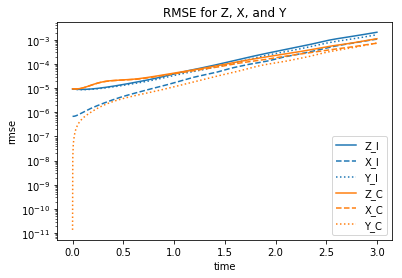

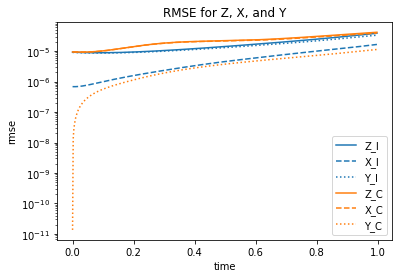

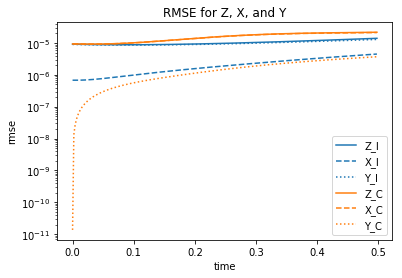

In [14]:
time = 8
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.plot(t_gt[:this_index], Zc_ave_rmse_I[:this_index], linestyle='-', color='C0')
plt.plot(t_gt[:this_index], Xc_ave_rmse_I[:this_index], linestyle='--', color='C0')
plt.plot(t_gt[:this_index], Yc_ave_rmse_I[:this_index], linestyle=':', color='C0')
plt.plot(t_gt[:this_index], Zc_ave_rmse_C[:this_index], linestyle='-', color='C1')
plt.plot(t_gt[:this_index], Xc_ave_rmse_C[:this_index], linestyle='--', color='C1')
plt.plot(t_gt[:this_index], Yc_ave_rmse_C[:this_index], linestyle=':', color='C1')
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z_I', 'X_I', 'Y_I',
            'Z_C', 'X_C', 'Y_C'])

time = 3
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.plot(t_gt[:this_index], Zc_ave_rmse_I[:this_index], linestyle='-', color='C0')
plt.plot(t_gt[:this_index], Xc_ave_rmse_I[:this_index], linestyle='--', color='C0')
plt.plot(t_gt[:this_index], Yc_ave_rmse_I[:this_index], linestyle=':', color='C0')
plt.plot(t_gt[:this_index], Zc_ave_rmse_C[:this_index], linestyle='-', color='C1')
plt.plot(t_gt[:this_index], Xc_ave_rmse_C[:this_index], linestyle='--', color='C1')
plt.plot(t_gt[:this_index], Yc_ave_rmse_C[:this_index], linestyle=':', color='C1')
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z_I', 'X_I', 'Y_I',
            'Z_C', 'X_C', 'Y_C'])

time = 1
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.plot(t_gt[:this_index], Zc_ave_rmse_I[:this_index], linestyle='-', color='C0')
plt.plot(t_gt[:this_index], Xc_ave_rmse_I[:this_index], linestyle='--', color='C0')
plt.plot(t_gt[:this_index], Yc_ave_rmse_I[:this_index], linestyle=':', color='C0')
plt.plot(t_gt[:this_index], Zc_ave_rmse_C[:this_index], linestyle='-', color='C1')
plt.plot(t_gt[:this_index], Xc_ave_rmse_C[:this_index], linestyle='--', color='C1')
plt.plot(t_gt[:this_index], Yc_ave_rmse_C[:this_index], linestyle=':', color='C1')
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z_I', 'X_I', 'Y_I',
            'Z_C', 'X_C', 'Y_C'])

time = 0.5
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.plot(t_gt[:this_index], Zc_ave_rmse_I[:this_index], linestyle='-', color='C0')
plt.plot(t_gt[:this_index], Xc_ave_rmse_I[:this_index], linestyle='--', color='C0')
plt.plot(t_gt[:this_index], Yc_ave_rmse_I[:this_index], linestyle=':', color='C0')
plt.plot(t_gt[:this_index], Zc_ave_rmse_C[:this_index], linestyle='-', color='C1')
plt.plot(t_gt[:this_index], Xc_ave_rmse_C[:this_index], linestyle='--', color='C1')
plt.plot(t_gt[:this_index], Yc_ave_rmse_C[:this_index], linestyle=':', color='C1')
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z_I', 'X_I', 'Y_I',
            'Z_C', 'X_C', 'Y_C'])



time = 8
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.semilogy(t_gt[:this_index], Zc_ave_rmse_I[:this_index], linestyle='-', color='C0')
plt.semilogy(t_gt[:this_index], Xc_ave_rmse_I[:this_index], linestyle='--', color='C0')
plt.semilogy(t_gt[:this_index], Yc_ave_rmse_I[:this_index], linestyle=':', color='C0')
plt.semilogy(t_gt[:this_index], Zc_ave_rmse_C[:this_index], linestyle='-', color='C1')
plt.semilogy(t_gt[:this_index], Xc_ave_rmse_C[:this_index], linestyle='--', color='C1')
plt.semilogy(t_gt[:this_index], Yc_ave_rmse_C[:this_index], linestyle=':', color='C1')
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z_I', 'X_I', 'Y_I',
            'Z_C', 'X_C', 'Y_C'])

time = 3
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.semilogy(t_gt[:this_index], Zc_ave_rmse_I[:this_index], linestyle='-', color='C0')
plt.semilogy(t_gt[:this_index], Xc_ave_rmse_I[:this_index], linestyle='--', color='C0')
plt.semilogy(t_gt[:this_index], Yc_ave_rmse_I[:this_index], linestyle=':', color='C0')
plt.semilogy(t_gt[:this_index], Zc_ave_rmse_C[:this_index], linestyle='-', color='C1')
plt.semilogy(t_gt[:this_index], Xc_ave_rmse_C[:this_index], linestyle='--', color='C1')
plt.semilogy(t_gt[:this_index], Yc_ave_rmse_C[:this_index], linestyle=':', color='C1')
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z_I', 'X_I', 'Y_I',
            'Z_C', 'X_C', 'Y_C'])

time = 1
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.semilogy(t_gt[:this_index], Zc_ave_rmse_I[:this_index], linestyle='-', color='C0')
plt.semilogy(t_gt[:this_index], Xc_ave_rmse_I[:this_index], linestyle='--', color='C0')
plt.semilogy(t_gt[:this_index], Yc_ave_rmse_I[:this_index], linestyle=':', color='C0')
plt.semilogy(t_gt[:this_index], Zc_ave_rmse_C[:this_index], linestyle='-', color='C1')
plt.semilogy(t_gt[:this_index], Xc_ave_rmse_C[:this_index], linestyle='--', color='C1')
plt.semilogy(t_gt[:this_index], Yc_ave_rmse_C[:this_index], linestyle=':', color='C1')
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z_I', 'X_I', 'Y_I',
            'Z_C', 'X_C', 'Y_C'])

time = 0.5
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.semilogy(t_gt[:this_index], Zc_ave_rmse_I[:this_index], linestyle='-', color='C0')
plt.semilogy(t_gt[:this_index], Xc_ave_rmse_I[:this_index], linestyle='--', color='C0')
plt.semilogy(t_gt[:this_index], Yc_ave_rmse_I[:this_index], linestyle=':', color='C0')
plt.semilogy(t_gt[:this_index], Zc_ave_rmse_C[:this_index], linestyle='-', color='C1')
plt.semilogy(t_gt[:this_index], Xc_ave_rmse_C[:this_index], linestyle='--', color='C1')
plt.semilogy(t_gt[:this_index], Yc_ave_rmse_C[:this_index], linestyle=':', color='C1')
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z_I', 'X_I', 'Y_I',
            'Z_C', 'X_C', 'Y_C'])

In [15]:
# for Uncorrelated

In [16]:
log_Z_I = np.log(Zc_ave_rmse_I)
log_X_I = np.log(Xc_ave_rmse_I)
log_Y_I = np.log(Yc_ave_rmse_I)

smoothing = 20
dt = t_gt[1] - t_gt[0]
D_log_Z_I = np.gradient(log_Z_I, dt)
D_log_Z_Ism = ndimage.uniform_filter1d(D_log_Z_I, smoothing)

D_log_X_I = np.gradient(log_X_I, dt)
D_log_X_Ism = ndimage.uniform_filter1d(D_log_X_I, smoothing)

D_log_Y_I = np.gradient(log_Y_I, dt)
D_log_Y_Ism = ndimage.uniform_filter1d(D_log_Y_I, smoothing)


smoothing2 = 100

D_log_Z_Ism2 = ndimage.uniform_filter1d(D_log_Z_I, smoothing2)
D_log_X_Ism2 = ndimage.uniform_filter1d(D_log_X_I, smoothing2)
D_log_Y_Ism2 = ndimage.uniform_filter1d(D_log_Y_I, smoothing2)

Text(0, 0.5, 'derivative')

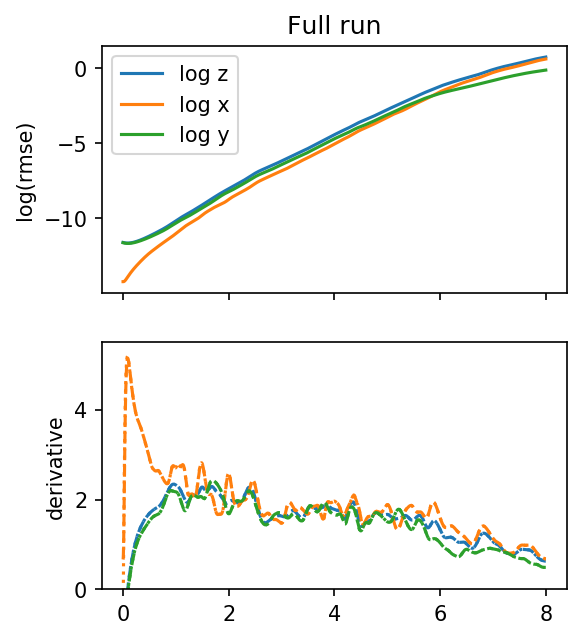

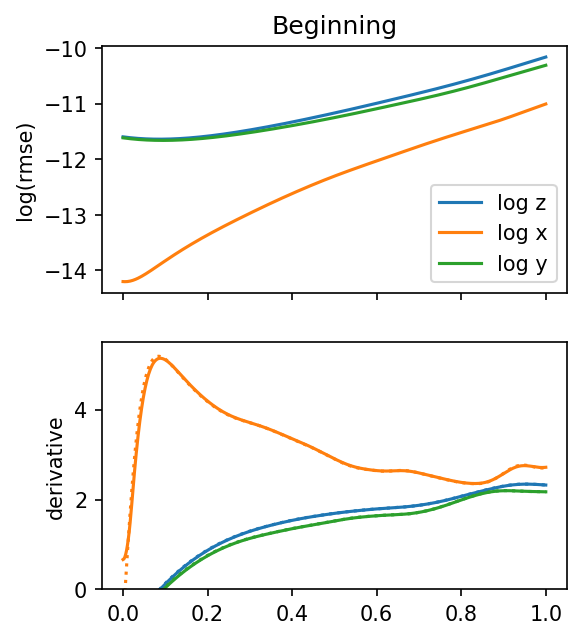

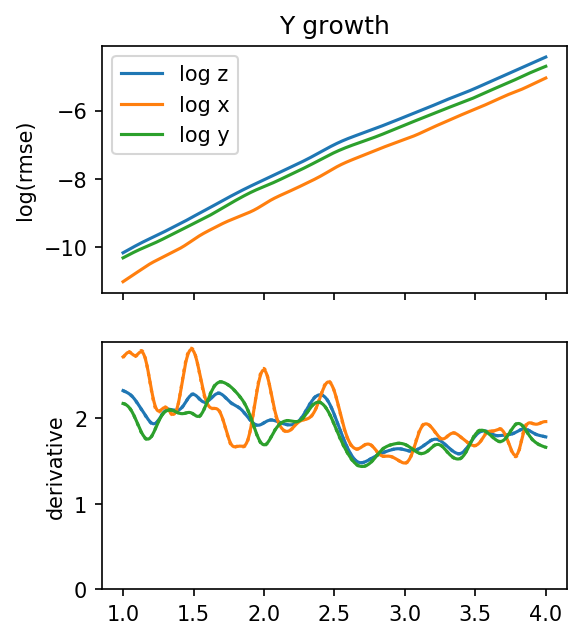

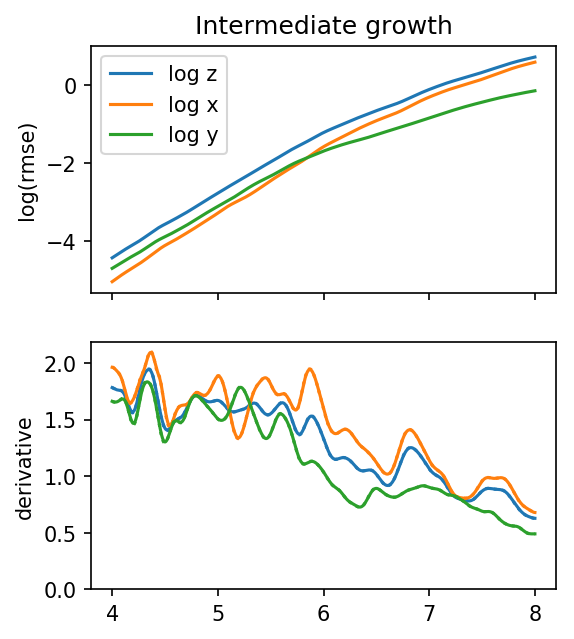

In [17]:
time0 = 0
time1 = 8

start = np.abs(t_gt - time0).argmin()
stop = np.abs(t_gt - time1).argmin()
slice_plot = slice(start, stop + 1)

figsize = plt.figaspect(1.2)
fig, ax = plt.subplots(nrows=2, sharex=True, dpi=150, figsize=figsize)
ax[0].plot(t_gt[slice_plot], log_Z_I[slice_plot], color='C0')
ax[0].plot(t_gt[slice_plot], log_X_I[slice_plot], color='C1')
ax[0].plot(t_gt[slice_plot], log_Y_I[slice_plot], color='C2')
ax[0].legend(['log z', 'log x', 'log y'])
ax[0].set_ylabel('log(rmse)')
ax[0].set_title('Full run')


ax[1].plot(t_gt[slice_plot], D_log_Z_I[slice_plot], color='C0', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Z_Ism[slice_plot], color='C0', linestyle='--')
ax[1].plot(t_gt[slice_plot], D_log_X_I[slice_plot], color='C1', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_X_Ism[slice_plot], color='C1', linestyle='--')
ax[1].plot(t_gt[slice_plot], D_log_Y_I[slice_plot], color='C2', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Y_Ism[slice_plot], color='C2', linestyle='--')
ax[1].set_ylim([0, None])
ax[1].set_ylabel('derivative')
# ax[1].legend(['z', 'z sm',
#               'x', 'x sm',
#               'y', 'y sm'])


time0 = 0
time1 = 1

start = np.abs(t_gt - time0).argmin()
stop = np.abs(t_gt - time1).argmin()
slice_plot = slice(start, stop + 1)

figsize = plt.figaspect(1.2)
fig, ax = plt.subplots(nrows=2, sharex=True, dpi=150, figsize=figsize)
ax[0].plot(t_gt[slice_plot], log_Z_I[slice_plot], color='C0')
ax[0].plot(t_gt[slice_plot], log_X_I[slice_plot], color='C1')
ax[0].plot(t_gt[slice_plot], log_Y_I[slice_plot], color='C2')
ax[0].legend(['log z', 'log x', 'log y'])
ax[0].set_ylabel('log(rmse)')
ax[0].set_title('Beginning')

ax[1].plot(t_gt[slice_plot], D_log_Z_I[slice_plot], color='C0', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Z_Ism[slice_plot], color='C0')
ax[1].plot(t_gt[slice_plot], D_log_X_I[slice_plot], color='C1', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_X_Ism[slice_plot], color='C1')
ax[1].plot(t_gt[slice_plot], D_log_Y_I[slice_plot], color='C2', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Y_Ism[slice_plot], color='C2')
ax[1].set_ylim([0, None])
ax[1].set_ylabel('derivative')
# ax[1].legend(['z', 'z sm',
#               'x', 'x sm',
#               'y', 'y sm'])

time0 = 1
time1 = 4

start = np.abs(t_gt - time0).argmin()
stop = np.abs(t_gt - time1).argmin()
slice_plot = slice(start, stop + 1)
y_growth_slice_I = slice_plot

figsize = plt.figaspect(1.2)
fig, ax = plt.subplots(nrows=2, sharex=True, dpi=150, figsize=figsize)
ax[0].plot(t_gt[slice_plot], log_Z_I[slice_plot], color='C0')
ax[0].plot(t_gt[slice_plot], log_X_I[slice_plot], color='C1')
ax[0].plot(t_gt[slice_plot], log_Y_I[slice_plot], color='C2')
ax[0].legend(['log z', 'log x', 'log y'])
ax[0].set_ylabel('log(rmse)')
ax[0].set_title('Y growth')


ax[1].plot(t_gt[slice_plot], D_log_Z_I[slice_plot], color='C0', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Z_Ism[slice_plot], color='C0')
ax[1].plot(t_gt[slice_plot], D_log_X_I[slice_plot], color='C1', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_X_Ism[slice_plot], color='C1')
ax[1].plot(t_gt[slice_plot], D_log_Y_I[slice_plot], color='C2', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Y_Ism[slice_plot], color='C2')
ax[1].set_ylim([0, None])
ax[1].set_ylabel('derivative')
# ax[1].legend(['z', 'z sm',
#               'x', 'x sm',
#               'y', 'y sm'])

time0 = 4
time1 = 8

start = np.abs(t_gt - time0).argmin()
stop = np.abs(t_gt - time1).argmin()
slice_plot = slice(start, stop + 1)

figsize = plt.figaspect(1.2)
fig, ax = plt.subplots(nrows=2, sharex=True, dpi=150, figsize=figsize)
ax[0].plot(t_gt[slice_plot], log_Z_I[slice_plot], color='C0')
ax[0].plot(t_gt[slice_plot], log_X_I[slice_plot], color='C1')
ax[0].plot(t_gt[slice_plot], log_Y_I[slice_plot], color='C2')
ax[0].legend(['log z', 'log x', 'log y'])
ax[0].set_ylabel('log(rmse)')
ax[0].set_title('Intermediate growth')

ax[1].plot(t_gt[slice_plot], D_log_Z_I[slice_plot], color='C0', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Z_Ism[slice_plot], color='C0')
ax[1].plot(t_gt[slice_plot], D_log_X_I[slice_plot], color='C1', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_X_Ism[slice_plot], color='C1')
ax[1].plot(t_gt[slice_plot], D_log_Y_I[slice_plot], color='C2', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Y_Ism[slice_plot], color='C2')
ax[1].set_ylim([0, None])
ax[1].set_ylabel('derivative')
# ax[1].legend(['z', 'z sm',
#               'x', 'x sm',
#               'y', 'y sm'])

# time0 = 1
# time1 = 5

# start = np.abs(t_gt - time0).argmin()
# stop = np.abs(t_gt - time1).argmin()
# slice_plot = slice(start, stop + 1)

# figsize = plt.figaspect(1.2)
# fig, ax = plt.subplots(nrows=2, sharex=True, dpi=150, figsize=figsize)
# ax[0].plot(t_gt[slice_plot], log_Z_I[slice_plot], color='C0')
# ax[0].plot(t_gt[slice_plot], log_X_I[slice_plot], color='C1')
# ax[0].plot(t_gt[slice_plot], log_Y_I[slice_plot], color='C2')
# ax[0].legend(['log z', 'log x', 'log y'])
# ax[0].set_ylabel('log(rmse)')
# ax[0].set_title('Y saturation')

# ax[1].plot(t_gt[slice_plot], D_log_Z_I[slice_plot], color='C0', linestyle=':')
# ax[1].plot(t_gt[slice_plot], D_log_Z_Ism[slice_plot], color='C0')
# ax[1].plot(t_gt[slice_plot], D_log_X_I[slice_plot], color='C1', linestyle=':')
# ax[1].plot(t_gt[slice_plot], D_log_X_Ism[slice_plot], color='C1')
# ax[1].plot(t_gt[slice_plot], D_log_Y_I[slice_plot], color='C2', linestyle=':')
# ax[1].plot(t_gt[slice_plot], D_log_Y_Ism[slice_plot], color='C2')
# ax[1].set_ylim([0, None])
# ax[1].set_ylabel('derivative')
# # ax[1].legend(['z', 'z sm',
# #               'x', 'x sm',
# #               'y', 'y sm'])

# time0 = 5
# time1 = 8

# start = np.abs(t_gt - time0).argmin()
# stop = np.abs(t_gt - time1).argmin()
# slice_plot = slice(start, stop + 1)

# x_growth_slice_I = slice_plot


# figsize = plt.figaspect(1.2)
# fig, ax = plt.subplots(nrows=2, sharex=True, dpi=150, figsize=figsize)
# ax[0].plot(t_gt[slice_plot], log_Z_I[slice_plot], color='C0')
# ax[0].plot(t_gt[slice_plot], log_X_I[slice_plot], color='C1')
# # ax[0].plot(t_gt[slice_plot], log_Y_I[slice_plot], color='C2')
# ax[0].legend(['log z', 'log x', 'log y'])
# ax[0].set_ylabel('log(rmse)')
# ax[0].set_title('X growth')


# ax[1].plot(t_gt[slice_plot], D_log_Z_I[slice_plot], color='C0', linestyle=':')
# ax[1].plot(t_gt[slice_plot], D_log_Z_Ism2[slice_plot], color='C0')
# ax[1].plot(t_gt[slice_plot], D_log_X_I[slice_plot], color='C1', linestyle=':')
# ax[1].plot(t_gt[slice_plot], D_log_X_Ism2[slice_plot], color='C1')
# # ax[1].plot(t_gt[slice_plot], D_log_Y_I[slice_plot], color='C2', linestyle=':')
# ax[1].plot(t_gt[slice_plot], D_log_Y_Ism2[slice_plot], color='C2')
# ax[1].set_ylim([0, None])
# ax[1].set_ylabel('derivative')
# # ax[1].legend(['z', 'z sm',
# #               'x', 'x sm',
# #               'y', 'y sm'])

In [18]:
%matplotlib inline

Text(0, 0.5, 'rmse')

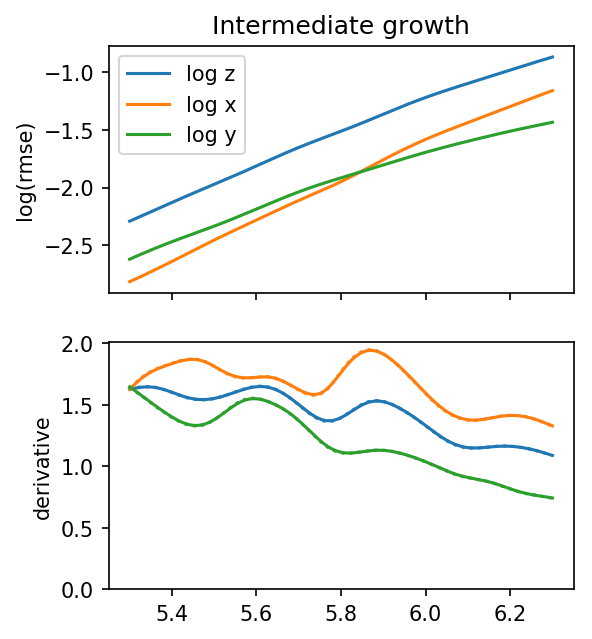

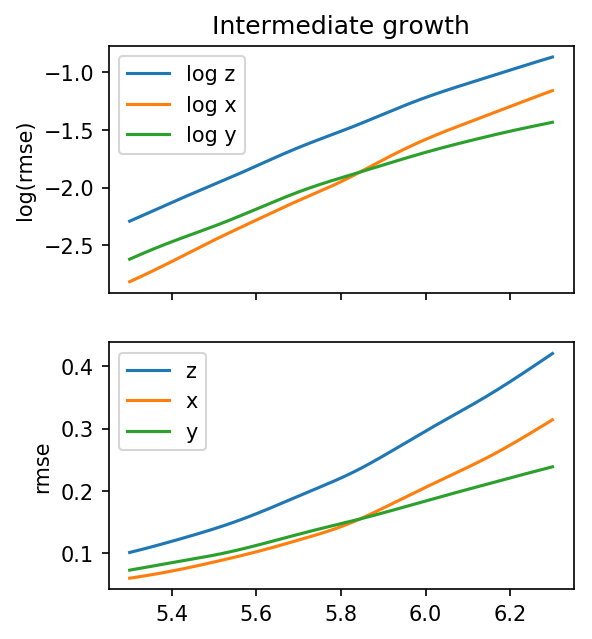

In [19]:
time0 = 5.8 - 0.5
time1 = 5.8 + 0.5

start = np.abs(t_gt - time0).argmin()
stop = np.abs(t_gt - time1).argmin()
slice_plot = slice(start, stop + 1)

figsize = plt.figaspect(1.2)
fig, ax = plt.subplots(nrows=2, sharex=True, dpi=150, figsize=figsize)
ax[0].plot(t_gt[slice_plot], log_Z_I[slice_plot], color='C0')
ax[0].plot(t_gt[slice_plot], log_X_I[slice_plot], color='C1')
ax[0].plot(t_gt[slice_plot], log_Y_I[slice_plot], color='C2')
ax[0].legend(['log z', 'log x', 'log y'])
ax[0].set_ylabel('log(rmse)')
ax[0].set_title('Intermediate growth')

ax[1].plot(t_gt[slice_plot], D_log_Z_I[slice_plot], color='C0', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Z_Ism[slice_plot], color='C0')
ax[1].plot(t_gt[slice_plot], D_log_X_I[slice_plot], color='C1', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_X_Ism[slice_plot], color='C1')
ax[1].plot(t_gt[slice_plot], D_log_Y_I[slice_plot], color='C2', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Y_Ism[slice_plot], color='C2')
ax[1].set_ylim([0, None])
ax[1].set_ylabel('derivative')
# ax[1].legend(['z', 'z sm',
#               'x', 'x sm',
#               'y', 'y sm'])


figsize = plt.figaspect(1.2)
fig, ax = plt.subplots(nrows=2, sharex=True, dpi=150, figsize=figsize)
ax[0].plot(t_gt[slice_plot], log_Z_I[slice_plot], color='C0')
ax[0].plot(t_gt[slice_plot], log_X_I[slice_plot], color='C1')
ax[0].plot(t_gt[slice_plot], log_Y_I[slice_plot], color='C2')
ax[0].legend(['log z', 'log x', 'log y'])
ax[0].set_ylabel('log(rmse)')
ax[0].set_title('Intermediate growth')

ax[1].plot(t_gt[slice_plot], Zc_ave_rmse_I[slice_plot], color='C0')
ax[1].plot(t_gt[slice_plot], Xc_ave_rmse_I[slice_plot], color='C1')
ax[1].plot(t_gt[slice_plot], Yc_ave_rmse_I[slice_plot], color='C2')
ax[1].legend(['z', 'x', 'y'])
ax[1].set_ylabel('rmse')






In [21]:
dt = 0.05

r_max = (Zc_ave_rmse_I[slice_plot].max()
     / ((np.exp(D_log_Z_I[slice_plot].min() * dt) + 1)**2 - 1))

r_min = (Zc_ave_rmse_I[slice_plot].min()
     / ((np.exp(D_log_Z_I[slice_plot].max() * dt) + 1)**2 - 1))

r_mid = (Zc_ave_rmse_I[slice_plot].mean()
     / ((np.exp(D_log_Z_I[slice_plot].mean() * dt) + 1)**2 - 1))

print(f'r max (dt: {dt}):   {r_max:0.3}')
print(f'r min (dt: {dt}):   {r_min:0.3}')
# print(f'r mid (dt: {dt}):   {((r_max + r_min)/2):0.3}')
print(f'r mid (dt: {dt}):   {r_mid:0.3}')

print(f'std max (dt: {dt}): {np.sqrt(r_max):0.3}')
print(f'std min (dt: {dt}): {np.sqrt(r_min):0.3}')
# print(f'std mid (dt: {dt}): {(np.sqrt((r_max + r_min)/2)):0.3}')
print(f'std mid (dt: {dt}): {np.sqrt(r_mid):0.3}')

print()
dt = 0.005

r_max = (Zc_ave_rmse_I[slice_plot].max()
     / ((np.exp(D_log_Z_I[slice_plot].min() * dt) + 1)**2 - 1))

r_min = (Zc_ave_rmse_I[slice_plot].min()
     / ((np.exp(D_log_Z_I[slice_plot].max() * dt) + 1)**2 - 1))

r_mid = (Zc_ave_rmse_I[slice_plot].mean()
     / ((np.exp(D_log_Z_I[slice_plot].mean() * dt) + 1)**2 - 1))

print(f'r max (dt: {dt}):   {r_max:0.3}')
print(f'r min (dt: {dt}):   {r_min:0.3}')
# print(f'r mid (dt: {dt}):   {((r_max + r_min)/2):0.3}')
print(f'r mid (dt: {dt}):   {r_mid:0.3}')

print(f'std max (dt: {dt}): {np.sqrt(r_max):0.3}')
print(f'std min (dt: {dt}): {np.sqrt(r_min):0.3}')
# print(f'std mid (dt: {dt}): {(np.sqrt((r_max + r_min)/2)):0.3}')
print(f'std mid (dt: {dt}): {np.sqrt(r_mid):0.3}')


print()
dt = 0.5

r_max = (Zc_ave_rmse_I[slice_plot].max()
     / ((np.exp(D_log_Z_I[slice_plot].min() * dt) + 1)**2 - 1))

r_min = (Zc_ave_rmse_I[slice_plot].min()
     / ((np.exp(D_log_Z_I[slice_plot].max() * dt) + 1)**2 - 1))

r_mid = (Zc_ave_rmse_I[slice_plot].mean()
     / ((np.exp(D_log_Z_I[slice_plot].mean() * dt) + 1)**2 - 1))

print(f'r max (dt: {dt}):   {r_max:0.3}')
print(f'r min (dt: {dt}):   {r_min:0.3}')
# print(f'r mid (dt: {dt}):   {((r_max + r_min)/2):0.3}')
print(f'r mid (dt: {dt}):   {r_mid:0.3}')

print(f'std max (dt: {dt}): {np.sqrt(r_max):0.3}')
print(f'std min (dt: {dt}): {np.sqrt(r_min):0.3}')
# print(f'std mid (dt: {dt}): {(np.sqrt((r_max + r_min)/2)):0.3}')
print(f'std mid (dt: {dt}): {np.sqrt(r_mid):0.3}')

r max (dt: 0.05):   0.13
r min (dt: 0.05):   0.0302
r mid (dt: 0.05):   0.0714
std max (dt: 0.05): 0.361
std min (dt: 0.05): 0.174
std mid (dt: 0.05): 0.267

r max (dt: 0.005):   0.139
r min (dt: 0.005):   0.0333
r mid (dt: 0.005):   0.0778
std max (dt: 0.005): 0.373
std min (dt: 0.005): 0.183
std mid (dt: 0.005): 0.279

r max (dt: 0.5):   0.0655
r min (dt: 0.5):   0.0103
r mid (dt: 0.5):   0.0286
std max (dt: 0.5): 0.256
std min (dt: 0.5): 0.102
std mid (dt: 0.5): 0.169


In [22]:
r max (dt: 0.05):   0.281
r min (dt: 0.05):   0.0186
r mid (dt: 0.05):   0.106
std max (dt: 0.05): 0.53
std min (dt: 0.05): 0.136
std mid (dt: 0.05): 0.325

SyntaxError: invalid syntax (<ipython-input-22-ecf82fe9a0ed>, line 1)

In [23]:
params_y, cov_p = optimize.curve_fit(
    lambda t,a,b: a*np.exp(b*t),
    t_gt[slice_plot],
    Zc_ave_rmse_I[slice_plot],
    p0=[1e-10, 1.5])

Yc_ave_rmse_Iest = params_y[0] * np.exp(params_y[1] * t_gt)
double_y = 1/np.log2(np.exp(params_y[1]))

Text(0.5, 1.0, 'Intermediate growth; double time: 0.501')

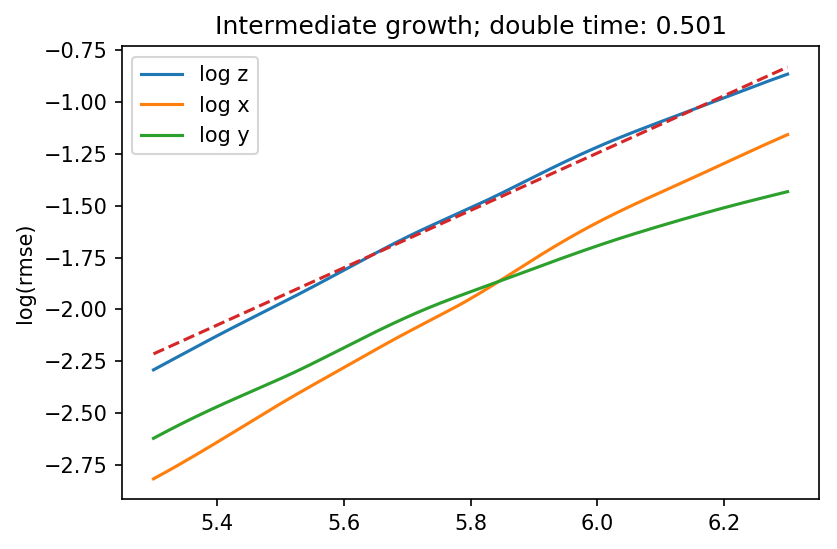

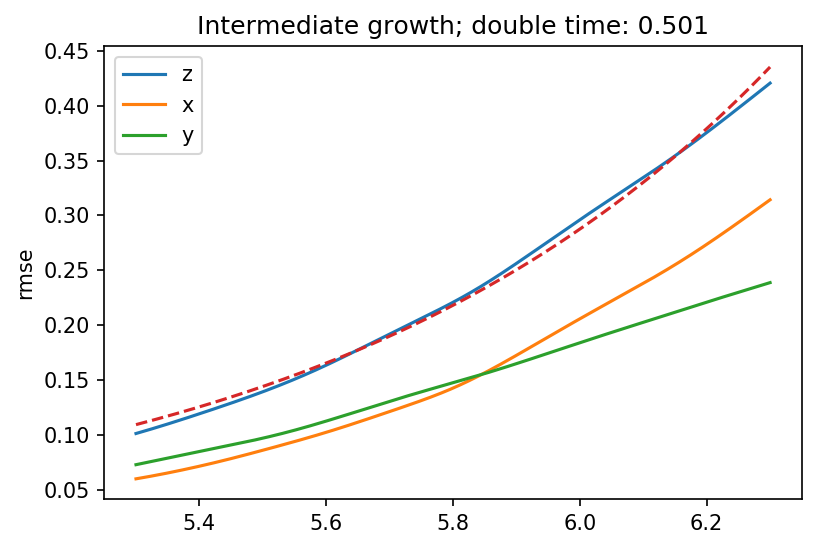

In [24]:
fig, ax = plt.subplots(nrows=1, sharex=True, dpi=150)
ax.plot(t_gt[slice_plot], log_Z_I[slice_plot], color='C0')
ax.plot(t_gt[slice_plot], log_X_I[slice_plot], color='C1')
ax.plot(t_gt[slice_plot], log_Y_I[slice_plot], color='C2')
ax.plot(t_gt[slice_plot],
        np.log(Yc_ave_rmse_Iest[slice_plot]),
        color='C3', linestyle='--')
ax.legend(['log z', 'log x', 'log y'])
ax.set_ylabel('log(rmse)')
ax.set_title(f'Intermediate growth; double time: {double_y:0.3}')

fig, ax = plt.subplots(nrows=1, sharex=True, dpi=150)
ax.plot(t_gt[slice_plot], Zc_ave_rmse_I[slice_plot], color='C0')
ax.plot(t_gt[slice_plot], Xc_ave_rmse_I[slice_plot], color='C1')
ax.plot(t_gt[slice_plot], Yc_ave_rmse_I[slice_plot], color='C2')
ax.plot(t_gt[slice_plot],
        Yc_ave_rmse_Iest[slice_plot],
        color='C3', linestyle='--')
ax.legend(['z', 'x', 'y'])
ax.set_ylabel('rmse')
ax.set_title(f'Intermediate growth; double time: {double_y:0.3}')

# time0 = 0
# time1 = 0.3

# start = np.abs(t_gt - time0).argmin()
# stop = np.abs(t_gt - time1).argmin()
# slice_plot = slice(start, stop + 1)

# fig, ax = plt.subplots(nrows=1, sharex=True, dpi=150)
# ax.plot(t_gt[slice_plot], Zc_ave_rmse_I[slice_plot], color='C0')
# ax.plot(t_gt[slice_plot], Xc_ave_rmse_I[slice_plot], color='C1')
# ax.plot(t_gt[slice_plot], Yc_ave_rmse_I[slice_plot], color='C2')
# ax.plot(t_gt[slice_plot],
#         Yc_ave_rmse_Iest[slice_plot],
#         color='C3', linestyle='--')
# ax.legend(['z', 'x', 'y'])
# ax.set_ylabel('rmse')
# ax.set_title(f'Y growth; double time: {double_y:0.3}')

In [25]:
time0 = 0
time1 = 0.3

start = np.abs(t_gt - time0).argmin()
stop = np.abs(t_gt - time1).argmin()
this_growth_slice = slice(start, stop + 1)

params_init, cov_p = optimize.curve_fit(
    lambda t,a,b: a*np.exp(b*t),
    t_gt[this_growth_slice],
    Zc_ave_rmse_I[this_growth_slice],
    p0=[1e-10, 25])

Zc_ave_rmse_Iest = params_init[0] * np.exp(params_init[1] * t_gt)
double_z = 1/np.log2(np.exp(params_init[1]))

Text(0.5, 1.0, 'Y growth; double time: 1.42')

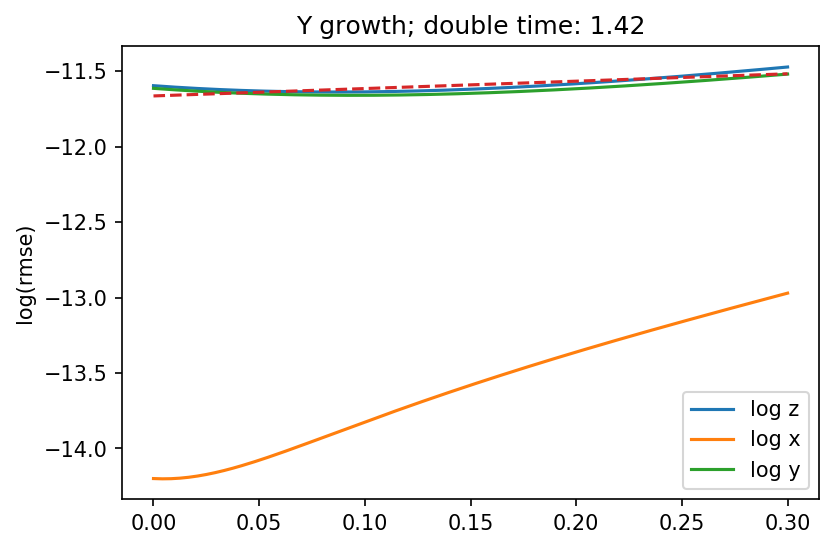

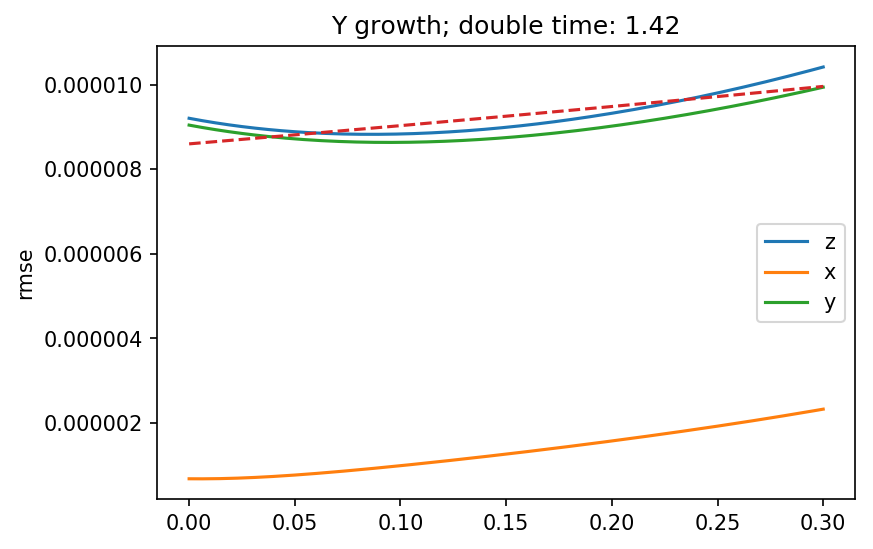

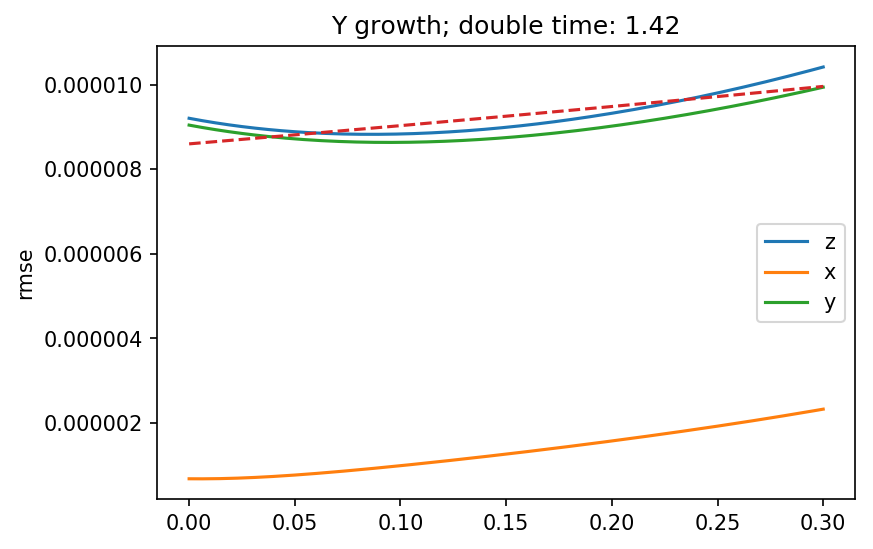

In [26]:
slice_plot = this_growth_slice

fig, ax = plt.subplots(nrows=1, sharex=True, dpi=150)
ax.plot(t_gt[slice_plot], log_Z_I[slice_plot], color='C0')
ax.plot(t_gt[slice_plot], log_X_I[slice_plot], color='C1')
ax.plot(t_gt[slice_plot], log_Y_I[slice_plot], color='C2')
ax.plot(t_gt[slice_plot],
        np.log(Zc_ave_rmse_Iest[slice_plot]),
        color='C3', linestyle='--')
ax.legend(['log z', 'log x', 'log y'])
ax.set_ylabel('log(rmse)')
ax.set_title(f'Y growth; double time: {double_z:0.3}')

fig, ax = plt.subplots(nrows=1, sharex=True, dpi=150)
ax.plot(t_gt[slice_plot], Zc_ave_rmse_I[slice_plot], color='C0')
ax.plot(t_gt[slice_plot], Xc_ave_rmse_I[slice_plot], color='C1')
ax.plot(t_gt[slice_plot], Yc_ave_rmse_I[slice_plot], color='C2')
ax.plot(t_gt[slice_plot],
        Zc_ave_rmse_Iest[slice_plot],
        color='C3', linestyle='--')
ax.legend(['z', 'x', 'y'])
ax.set_ylabel('rmse')
ax.set_title(f'Y growth; double time: {double_z:0.3}')

time0 = 0
time1 = 0.3

start = np.abs(t_gt - time0).argmin()
stop = np.abs(t_gt - time1).argmin()
slice_plot = slice(start, stop + 1)

fig, ax = plt.subplots(nrows=1, sharex=True, dpi=150)
ax.plot(t_gt[slice_plot], Zc_ave_rmse_I[slice_plot], color='C0')
ax.plot(t_gt[slice_plot], Xc_ave_rmse_I[slice_plot], color='C1')
ax.plot(t_gt[slice_plot], Yc_ave_rmse_I[slice_plot], color='C2')
ax.plot(t_gt[slice_plot],
        Zc_ave_rmse_Iest[slice_plot],
        color='C3', linestyle='--')
ax.legend(['z', 'x', 'y'])
ax.set_ylabel('rmse')
ax.set_title(f'Y growth; double time: {double_z:0.3}')

In [27]:
this_growth_slice = x_growth_slice_I

params_x, cov_p = optimize.curve_fit(
    lambda t,a,b: a*np.exp(b*t),
    t_gt[this_growth_slice],
    Xc_ave_rmse_I[this_growth_slice],
    p0=[1e-10, 0.08])

Xc_ave_rmse_Iest = params_x[0] * np.exp(params_x[1] * t_gt)
double_x = 1/np.log2(np.exp(params_x[1]))

NameError: name 'x_growth_slice_I' is not defined

In [ ]:
slice_plot = this_growth_slice

fig, ax = plt.subplots(nrows=1, sharex=True, dpi=150)
ax.plot(t_gt[slice_plot], log_Z_I[slice_plot], color='C0')
ax.plot(t_gt[slice_plot], log_X_I[slice_plot], color='C1')
# ax.plot(t_gt[slice_plot], log_Y_I[slice_plot], color='C2')
ax.plot(t_gt[slice_plot],
        np.log(Xc_ave_rmse_Iest[slice_plot]),
        color='C3', linestyle='--')
ax.legend(['log z', 'log x', 'log y'])
ax.set_ylabel('log(rmse)')
ax.set_title(f'X growth; double time: {double_x:0.3}')

fig, ax = plt.subplots(nrows=1, sharex=True, dpi=150)
ax.plot(t_gt[slice_plot], Zc_ave_rmse_I[slice_plot], color='C0')
ax.plot(t_gt[slice_plot], Xc_ave_rmse_I[slice_plot], color='C1')
# ax.plot(t_gt[slice_plot], Yc_ave_rmse_I[slice_plot], color='C2')
ax.plot(t_gt[slice_plot],
        Xc_ave_rmse_Iest[slice_plot],
        color='C3', linestyle='--')
ax.legend(['z', 'x', 'y'])
ax.set_ylabel('rmse')
ax.set_title(f'X growth; double time: {double_x:0.3}')

time0 = 1
time1 = 8

start = np.abs(t_gt - time0).argmin()
stop = np.abs(t_gt - time1).argmin()
slice_plot = slice(start, stop + 1)

fig, ax = plt.subplots(nrows=1, sharex=True, dpi=150)
ax.plot(t_gt[slice_plot], Zc_ave_rmse_I[slice_plot], color='C0')
ax.plot(t_gt[slice_plot], Xc_ave_rmse_I[slice_plot], color='C1')
# ax.plot(t_gt[slice_plot], Yc_ave_rmse_I[slice_plot], color='C2')
ax.plot(t_gt[slice_plot],
        Xc_ave_rmse_Iest[slice_plot],
        color='C3', linestyle='--')
ax.legend(['z', 'x', 'y'])
ax.set_ylabel('rmse')
ax.set_title(f'X growth; double time: {double_x:0.3}')

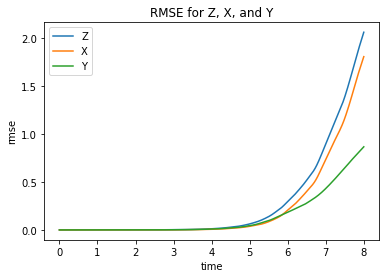

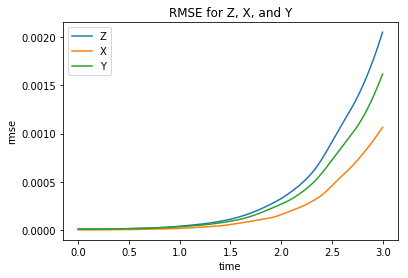

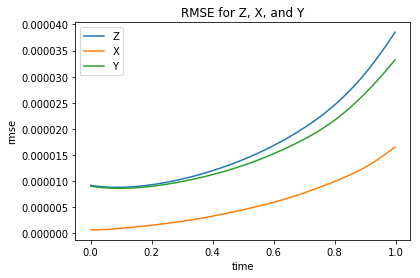

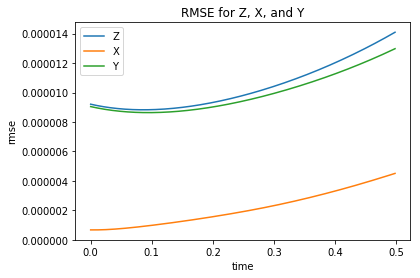

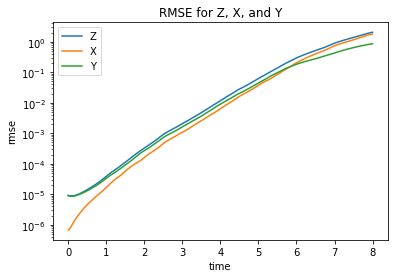

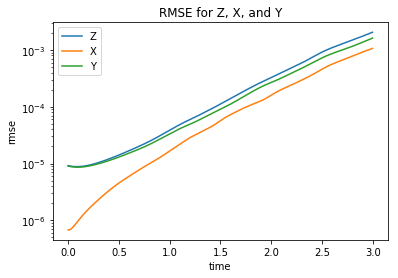

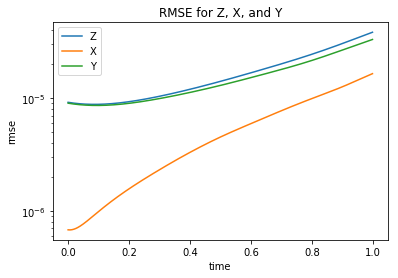

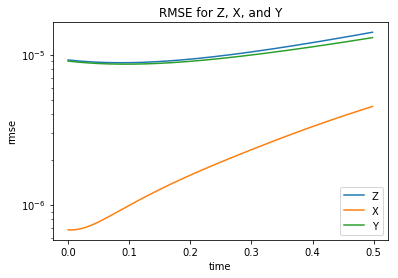

In [28]:
time = 8
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.plot(t_gt[:this_index], Zc_ave_rmse_I[:this_index])
plt.plot(t_gt[:this_index], Xc_ave_rmse_I[:this_index])
plt.plot(t_gt[:this_index], Yc_ave_rmse_I[:this_index])
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z', 'X', 'Y'])

time = 3
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.plot(t_gt[:this_index], Zc_ave_rmse_I[:this_index])
plt.plot(t_gt[:this_index], Xc_ave_rmse_I[:this_index])
plt.plot(t_gt[:this_index], Yc_ave_rmse_I[:this_index])
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z', 'X', 'Y'])

time = 1
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.plot(t_gt[:this_index], Zc_ave_rmse_I[:this_index])
plt.plot(t_gt[:this_index], Xc_ave_rmse_I[:this_index])
plt.plot(t_gt[:this_index], Yc_ave_rmse_I[:this_index])
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z', 'X', 'Y'])

time = 0.5
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.plot(t_gt[:this_index], Zc_ave_rmse_I[:this_index])
plt.plot(t_gt[:this_index], Xc_ave_rmse_I[:this_index])
plt.plot(t_gt[:this_index], Yc_ave_rmse_I[:this_index])
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z', 'X', 'Y'])

time = 8
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.semilogy(t_gt[:this_index], Zc_ave_rmse_I[:this_index])
plt.semilogy(t_gt[:this_index], Xc_ave_rmse_I[:this_index])
plt.semilogy(t_gt[:this_index], Yc_ave_rmse_I[:this_index])
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z', 'X', 'Y'])

time = 3
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.semilogy(t_gt[:this_index], Zc_ave_rmse_I[:this_index])
plt.semilogy(t_gt[:this_index], Xc_ave_rmse_I[:this_index])
plt.semilogy(t_gt[:this_index], Yc_ave_rmse_I[:this_index])
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z', 'X', 'Y'])

time = 1
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.semilogy(t_gt[:this_index], Zc_ave_rmse_I[:this_index])
plt.semilogy(t_gt[:this_index], Xc_ave_rmse_I[:this_index])
plt.semilogy(t_gt[:this_index], Yc_ave_rmse_I[:this_index])
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z', 'X', 'Y'])

time = 0.5
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.semilogy(t_gt[:this_index], Zc_ave_rmse_I[:this_index])
plt.semilogy(t_gt[:this_index], Xc_ave_rmse_I[:this_index])
plt.semilogy(t_gt[:this_index], Yc_ave_rmse_I[:this_index])
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z', 'X', 'Y'])

Text(0.5, 1.0, 'RMSE for Y')

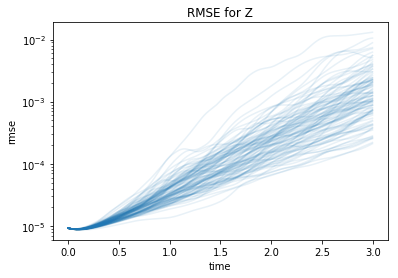

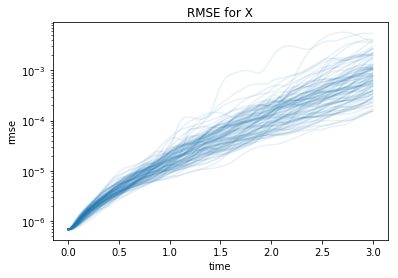

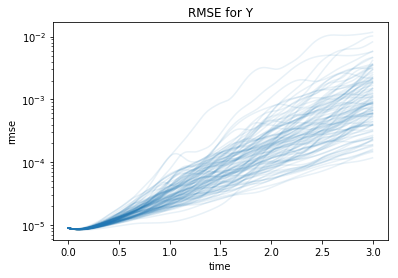

In [29]:
time = 3
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.semilogy(t_gt[:this_index], Z_ave_rmse_I[:, :this_index].T, color='C0', alpha=0.1)
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z')

time = 3
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.semilogy(t_gt[:this_index], X_ave_rmse_I[:, :this_index].T, color='C0', alpha=0.1)
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for X')

time = 3
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.semilogy(t_gt[:this_index], Y_ave_rmse_I[:, :this_index].T, color='C0', alpha=0.1)
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Y')

In [30]:
# for Correlated

In [31]:
log_Z_C = np.log(Zc_ave_rmse_C)
log_X_C = np.log(Xc_ave_rmse_C)
log_Y_C = np.log(Yc_ave_rmse_C)

smoothing = 20
dt = t_gt[1] - t_gt[0]
D_log_Z_C = np.gradient(log_Z_C, dt)
D_log_Z_Csm = ndimage.uniform_filter1d(D_log_Z_C, smoothing)

D_log_X_C = np.gradient(log_X_C, dt)
D_log_X_Csm = ndimage.uniform_filter1d(D_log_X_C, smoothing)

D_log_Y_C = np.gradient(log_Y_C, dt)
D_log_Y_Csm = ndimage.uniform_filter1d(D_log_Y_C, smoothing)


smoothing2 = 100

D_log_Z_Csm2 = ndimage.uniform_filter1d(D_log_Z_C, smoothing2)
D_log_X_Csm2 = ndimage.uniform_filter1d(D_log_X_C, smoothing2)
D_log_Y_Csm2 = ndimage.uniform_filter1d(D_log_Y_C, smoothing2)

(0, 15)

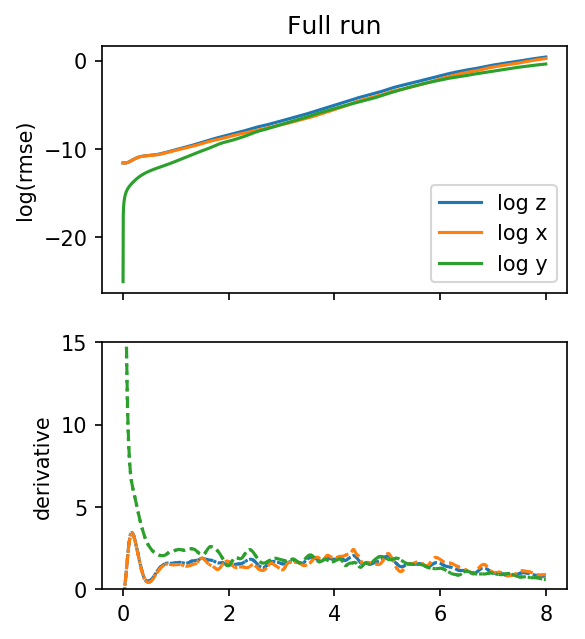

In [32]:
time0 = 0
time1 = 8

start = np.abs(t_gt - time0).argmin()
stop = np.abs(t_gt - time1).argmin()
slice_plot = slice(start, stop + 1)

figsize = plt.figaspect(1.2)
fig, ax = plt.subplots(nrows=2, sharex=True, dpi=150, figsize=figsize)
ax[0].plot(t_gt[slice_plot], log_Z_C[slice_plot], color='C0')
ax[0].plot(t_gt[slice_plot], log_X_C[slice_plot], color='C1')
ax[0].plot(t_gt[slice_plot], log_Y_C[slice_plot], color='C2')
ax[0].legend(['log z', 'log x', 'log y'])
ax[0].set_ylabel('log(rmse)')
ax[0].set_title('Full run')


ax[1].plot(t_gt[slice_plot], D_log_Z_C[slice_plot], color='C0', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Z_Csm[slice_plot], color='C0', linestyle='--')
ax[1].plot(t_gt[slice_plot], D_log_X_C[slice_plot], color='C1', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_X_Csm[slice_plot], color='C1', linestyle='--')
ax[1].plot(t_gt[slice_plot], D_log_Y_C[slice_plot], color='C2', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Y_Csm[slice_plot], color='C2', linestyle='--')
ax[1].set_ylim([0, None])
ax[1].set_ylabel('derivative')
ax[1].set_ylim([0, 15])
# ax[1].legend(['z', 'z sm',
#               'x', 'x sm',
#               'y', 'y sm'])

Text(0, 0.5, 'derivative')

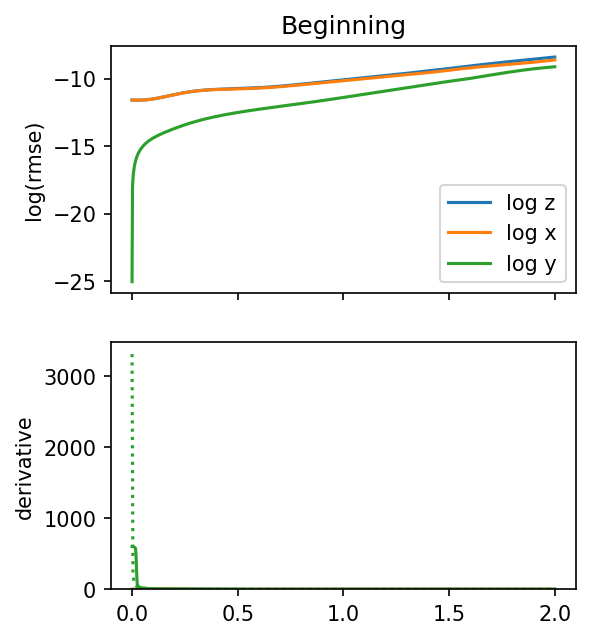

In [33]:
time0 = 0
time1 = 2

start = np.abs(t_gt - time0).argmin()
stop = np.abs(t_gt - time1).argmin()
slice_plot = slice(start, stop + 1)

figsize = plt.figaspect(1.2)
fig, ax = plt.subplots(nrows=2, sharex=True, dpi=150, figsize=figsize)
ax[0].plot(t_gt[slice_plot], log_Z_C[slice_plot], color='C0')
ax[0].plot(t_gt[slice_plot], log_X_C[slice_plot], color='C1')
ax[0].plot(t_gt[slice_plot], log_Y_C[slice_plot], color='C2')
ax[0].legend(['log z', 'log x', 'log y'])
ax[0].set_ylabel('log(rmse)')
ax[0].set_title('Beginning')

ax[1].plot(t_gt[slice_plot], D_log_Z_C[slice_plot], color='C0', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Z_Csm[slice_plot], color='C0')
ax[1].plot(t_gt[slice_plot], D_log_X_C[slice_plot], color='C1', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_X_Csm[slice_plot], color='C1')
ax[1].plot(t_gt[slice_plot], D_log_Y_C[slice_plot], color='C2', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Y_Csm[slice_plot], color='C2')
ax[1].set_ylim([0, None])
ax[1].set_ylabel('derivative')
# ax[1].legend(['z', 'z sm',
#               'x', 'x sm',
#               'y', 'y sm'])

Text(0, 0.5, 'derivative')

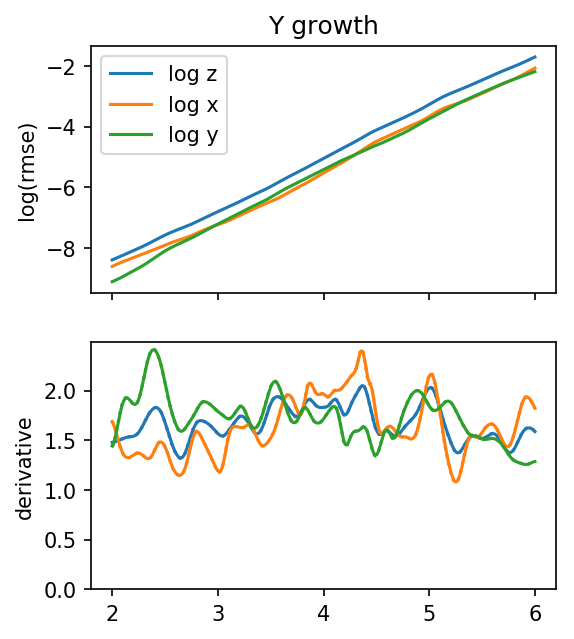

In [34]:
time0 = 2
time1 = 6

start = np.abs(t_gt - time0).argmin()
stop = np.abs(t_gt - time1).argmin()
slice_plot = slice(start, stop + 1)

y_growth_slice_C = slice_plot

figsize = plt.figaspect(1.2)
fig, ax = plt.subplots(nrows=2, sharex=True, dpi=150, figsize=figsize)
ax[0].plot(t_gt[slice_plot], log_Z_C[slice_plot], color='C0')
ax[0].plot(t_gt[slice_plot], log_X_C[slice_plot], color='C1')
ax[0].plot(t_gt[slice_plot], log_Y_C[slice_plot], color='C2')
ax[0].legend(['log z', 'log x', 'log y'])
ax[0].set_ylabel('log(rmse)')
ax[0].set_title('Y growth')


ax[1].plot(t_gt[slice_plot], D_log_Z_C[slice_plot], color='C0', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Z_Csm[slice_plot], color='C0')
ax[1].plot(t_gt[slice_plot], D_log_X_C[slice_plot], color='C1', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_X_Csm[slice_plot], color='C1')
ax[1].plot(t_gt[slice_plot], D_log_Y_C[slice_plot], color='C2', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Y_Csm[slice_plot], color='C2')
ax[1].set_ylim([0, None])
ax[1].set_ylabel('derivative')
# ax[1].legend(['z', 'z sm',
#               'x', 'x sm',
#               'y', 'y sm'])

Text(0, 0.5, 'derivative')

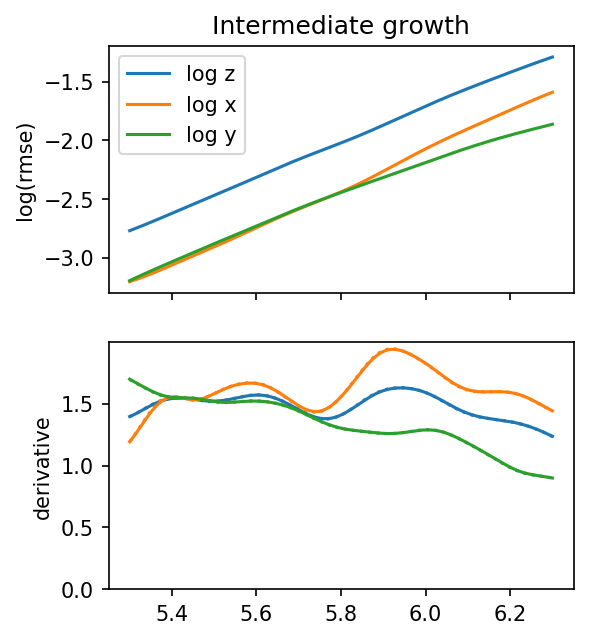

In [35]:
time0 = 5.8 - 0.5
time1 = 5.8 + 0.5

start = np.abs(t_gt - time0).argmin()
stop = np.abs(t_gt - time1).argmin()
slice_plot = slice(start, stop + 1)

figsize = plt.figaspect(1.2)
fig, ax = plt.subplots(nrows=2, sharex=True, dpi=150, figsize=figsize)
ax[0].plot(t_gt[slice_plot], log_Z_C[slice_plot], color='C0')
ax[0].plot(t_gt[slice_plot], log_X_C[slice_plot], color='C1')
ax[0].plot(t_gt[slice_plot], log_Y_C[slice_plot], color='C2')
ax[0].legend(['log z', 'log x', 'log y'])
ax[0].set_ylabel('log(rmse)')
ax[0].set_title('Intermediate growth')

ax[1].plot(t_gt[slice_plot], D_log_Z_C[slice_plot], color='C0', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Z_Csm[slice_plot], color='C0')
ax[1].plot(t_gt[slice_plot], D_log_X_C[slice_plot], color='C1', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_X_Csm[slice_plot], color='C1')
ax[1].plot(t_gt[slice_plot], D_log_Y_C[slice_plot], color='C2', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Y_Csm[slice_plot], color='C2')
ax[1].set_ylim([0, None])
ax[1].set_ylabel('derivative')
# ax[1].legend(['z', 'z sm',
#               'x', 'x sm',
#               'y', 'y sm'])

# time0 = 1.5
# time1 = 5

# start = np.abs(t_gt - time0).argmin()
# stop = np.abs(t_gt - time1).argmin()
# slice_plot = slice(start, stop + 1)

# figsize = plt.figaspect(1.2)
# fig, ax = plt.subplots(nrows=2, sharex=True, dpi=150, figsize=figsize)
# ax[0].plot(t_gt[slice_plot], log_Z_C[slice_plot], color='C0')
# ax[0].plot(t_gt[slice_plot], log_X_C[slice_plot], color='C1')
# ax[0].plot(t_gt[slice_plot], log_Y_C[slice_plot], color='C2')
# ax[0].legend(['log z', 'log x', 'log y'])
# ax[0].set_ylabel('log(rmse)')
# ax[0].set_title('Y saturation')

# ax[1].plot(t_gt[slice_plot], D_log_Z_C[slice_plot], color='C0', linestyle=':')
# ax[1].plot(t_gt[slice_plot], D_log_Z_Csm[slice_plot], color='C0')
# ax[1].plot(t_gt[slice_plot], D_log_X_C[slice_plot], color='C1', linestyle=':')
# ax[1].plot(t_gt[slice_plot], D_log_X_Csm[slice_plot], color='C1')
# ax[1].plot(t_gt[slice_plot], D_log_Y_C[slice_plot], color='C2', linestyle=':')
# ax[1].plot(t_gt[slice_plot], D_log_Y_Csm[slice_plot], color='C2')
# ax[1].set_ylim([0, None])
# ax[1].set_ylabel('derivative')
# # ax[1].legend(['z', 'z sm',
# #               'x', 'x sm',
# #               'y', 'y sm'])

# time0 = 5
# time1 = 8

# start = np.abs(t_gt - time0).argmin()
# stop = np.abs(t_gt - time1).argmin()
# slice_plot = slice(start, stop + 1)

# x_growth_slice_C = slice_plot

# figsize = plt.figaspect(1.2)
# fig, ax = plt.subplots(nrows=2, sharex=True, dpi=150, figsize=figsize)
# ax[0].plot(t_gt[slice_plot], log_Z_C[slice_plot], color='C0')
# ax[0].plot(t_gt[slice_plot], log_X_C[slice_plot], color='C1')
# # ax[0].plot(t_gt[slice_plot], log_Y_I[slice_plot], color='C2')
# ax[0].legend(['log z', 'log x', 'log y'])
# ax[0].set_ylabel('log(rmse)')
# ax[0].set_title('X growth')


# ax[1].plot(t_gt[slice_plot], D_log_Z_C[slice_plot], color='C0', linestyle=':')
# ax[1].plot(t_gt[slice_plot], D_log_Z_Csm2[slice_plot], color='C0')
# ax[1].plot(t_gt[slice_plot], D_log_X_C[slice_plot], color='C1', linestyle=':')
# ax[1].plot(t_gt[slice_plot], D_log_X_Csm2[slice_plot], color='C1')
# # ax[1].plot(t_gt[slice_plot], D_log_Y_I[slice_plot], color='C2', linestyle=':')
# ax[1].plot(t_gt[slice_plot], D_log_Y_Csm2[slice_plot], color='C2')
# ax[1].set_ylim([0, None])
# ax[1].set_ylabel('derivative')
# # ax[1].legend(['z', 'z sm',
# #               'x', 'x sm',
# #               'y', 'y sm'])

In [36]:
params_y, cov_p = optimize.curve_fit(
    lambda t,a,b: a*np.exp(b*t),
    t_gt[y_growth_slice_C],
    Yc_ave_rmse_C[y_growth_slice_C],
    p0=[1e-10, 25])

Yc_ave_rmse_Cest = params_y[0] * np.exp(params_y[1] * t_gt)
double_y = 1/np.log2(np.exp(params_y[1]))

Text(0.5, 1.0, 'Y growth; double time: 0.0277')

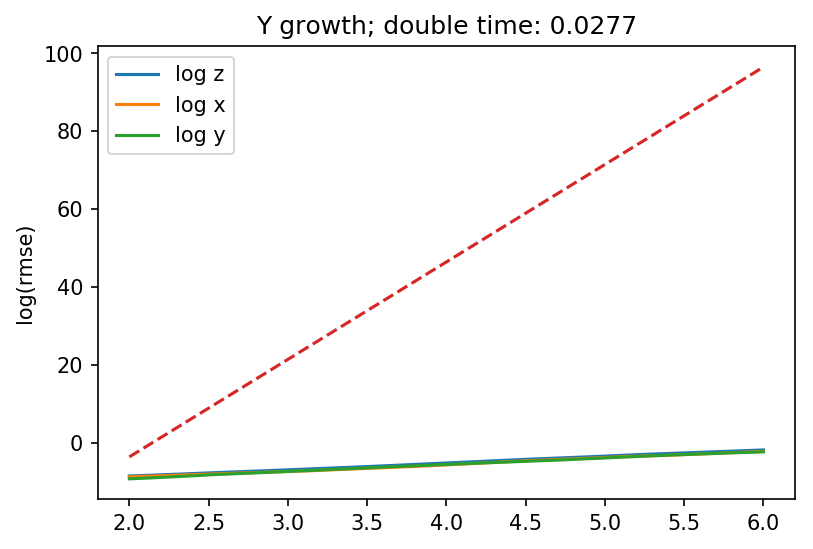

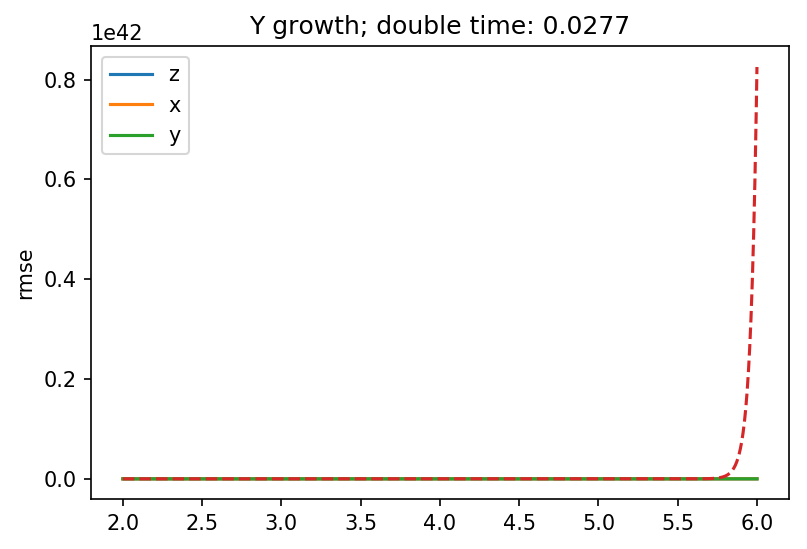

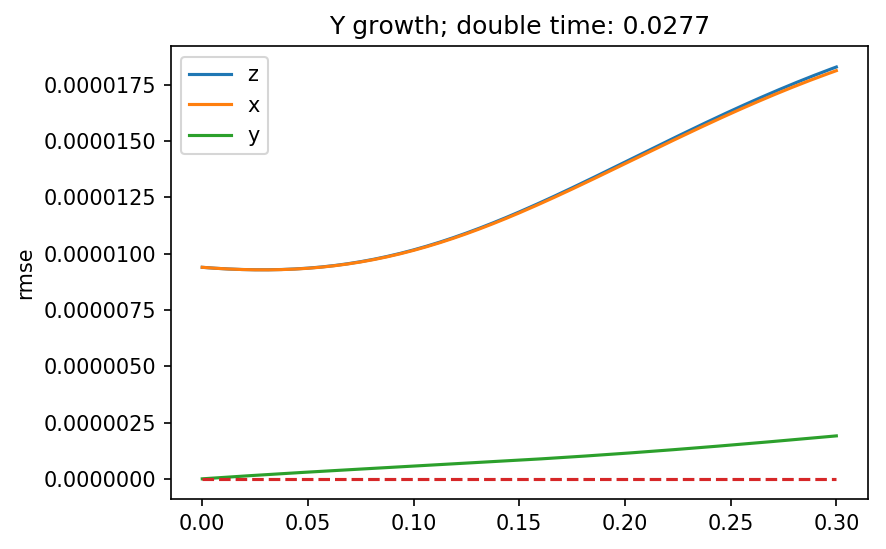

In [37]:
fig, ax = plt.subplots(nrows=1, sharex=True, dpi=150)
ax.plot(t_gt[y_growth_slice_C], log_Z_C[y_growth_slice_C], color='C0')
ax.plot(t_gt[y_growth_slice_C], log_X_C[y_growth_slice_C], color='C1')
ax.plot(t_gt[y_growth_slice_C], log_Y_C[y_growth_slice_C], color='C2')
ax.plot(t_gt[y_growth_slice_C],
        np.log(Yc_ave_rmse_Cest[y_growth_slice_C]),
        color='C3', linestyle='--')
ax.legend(['log z', 'log x', 'log y'])
ax.set_ylabel('log(rmse)')
ax.set_title(f'Y growth; double time: {double_y:0.3}')

fig, ax = plt.subplots(nrows=1, sharex=True, dpi=150)
ax.plot(t_gt[y_growth_slice_C], Zc_ave_rmse_C[y_growth_slice_C], color='C0')
ax.plot(t_gt[y_growth_slice_C], Xc_ave_rmse_C[y_growth_slice_C], color='C1')
ax.plot(t_gt[y_growth_slice_C], Yc_ave_rmse_C[y_growth_slice_C], color='C2')
ax.plot(t_gt[y_growth_slice_C],
        Yc_ave_rmse_Cest[y_growth_slice_C],
        color='C3', linestyle='--')
ax.legend(['z', 'x', 'y'])
ax.set_ylabel('rmse')
ax.set_title(f'Y growth; double time: {double_y:0.3}')

time0 = 0
time1 = 0.3

start = np.abs(t_gt - time0).argmin()
stop = np.abs(t_gt - time1).argmin()
slice_plot = slice(start, stop + 1)

fig, ax = plt.subplots(nrows=1, sharex=True, dpi=150)
ax.plot(t_gt[slice_plot], Zc_ave_rmse_C[slice_plot], color='C0')
ax.plot(t_gt[slice_plot], Xc_ave_rmse_C[slice_plot], color='C1')
ax.plot(t_gt[slice_plot], Yc_ave_rmse_C[slice_plot], color='C2')
ax.plot(t_gt[slice_plot],
        Yc_ave_rmse_Cest[slice_plot],
        color='C3', linestyle='--')
ax.legend(['z', 'x', 'y'])
ax.set_ylabel('rmse')
ax.set_title(f'Y growth; double time: {double_y:0.3}')

In [38]:
time0 = 0
time1 = 0.3

start = np.abs(t_gt - time0).argmin()
stop = np.abs(t_gt - time1).argmin()
this_growth_slice = slice(start, stop + 1)

params_init, cov_p = optimize.curve_fit(
    lambda t,a,b: a*np.exp(b*t),
    t_gt[this_growth_slice],
    Zc_ave_rmse_C[this_growth_slice],
    p0=[1e-5, 25])

Zc_ave_rmse_Cest = params_init[0] * np.exp(params_init[1] * t_gt)
double_z = 1/np.log2(np.exp(params_init[1]))

Text(0.5, 1.0, 'Y growth; double time: 0.253')

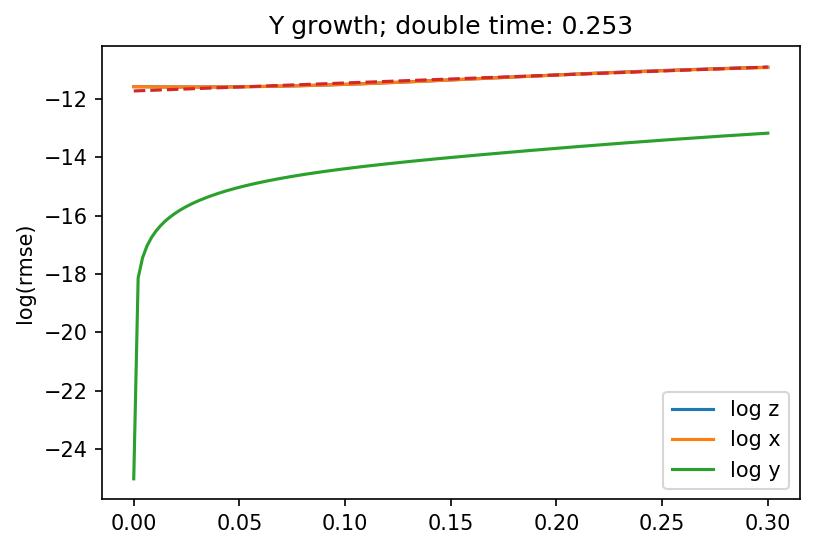

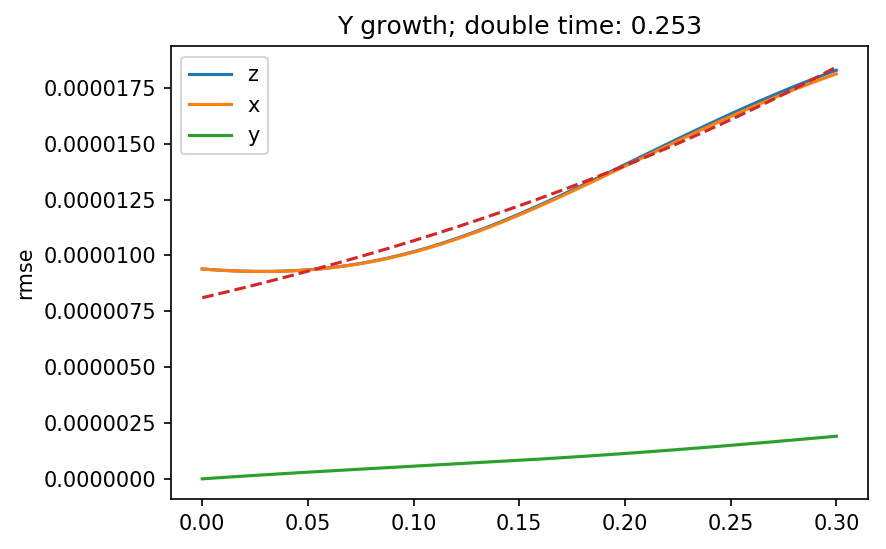

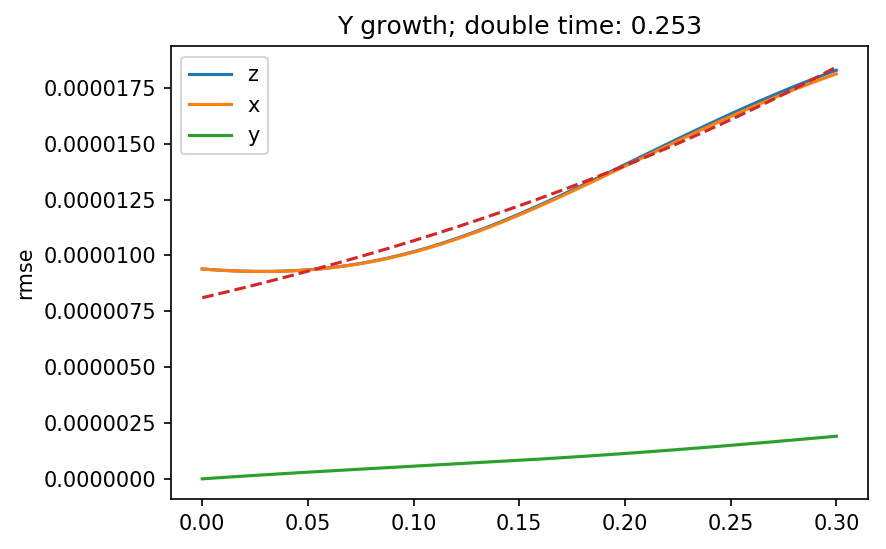

In [39]:
slice_plot = this_growth_slice

fig, ax = plt.subplots(nrows=1, sharex=True, dpi=150)
ax.plot(t_gt[slice_plot], log_Z_C[slice_plot], color='C0')
ax.plot(t_gt[slice_plot], log_X_C[slice_plot], color='C1')
ax.plot(t_gt[slice_plot], log_Y_C[slice_plot], color='C2')
ax.plot(t_gt[slice_plot],
        np.log(Zc_ave_rmse_Cest[slice_plot]),
        color='C3', linestyle='--')
ax.legend(['log z', 'log x', 'log y'])
ax.set_ylabel('log(rmse)')
ax.set_title(f'Y growth; double time: {double_z:0.3}')

fig, ax = plt.subplots(nrows=1, sharex=True, dpi=150)
ax.plot(t_gt[slice_plot], Zc_ave_rmse_C[slice_plot], color='C0')
ax.plot(t_gt[slice_plot], Xc_ave_rmse_C[slice_plot], color='C1')
ax.plot(t_gt[slice_plot], Yc_ave_rmse_C[slice_plot], color='C2')
ax.plot(t_gt[slice_plot],
        Zc_ave_rmse_Cest[slice_plot],
        color='C3', linestyle='--')
ax.legend(['z', 'x', 'y'])
ax.set_ylabel('rmse')
ax.set_title(f'Y growth; double time: {double_z:0.3}')

time0 = 0
time1 = 0.3

start = np.abs(t_gt - time0).argmin()
stop = np.abs(t_gt - time1).argmin()
slice_plot = slice(start, stop + 1)

fig, ax = plt.subplots(nrows=1, sharex=True, dpi=150)
ax.plot(t_gt[slice_plot], Zc_ave_rmse_C[slice_plot], color='C0')
ax.plot(t_gt[slice_plot], Xc_ave_rmse_C[slice_plot], color='C1')
ax.plot(t_gt[slice_plot], Yc_ave_rmse_C[slice_plot], color='C2')
ax.plot(t_gt[slice_plot],
        Zc_ave_rmse_Cest[slice_plot],
        color='C3', linestyle='--')
ax.legend(['z', 'x', 'y'])
ax.set_ylabel('rmse')
ax.set_title(f'Y growth; double time: {double_z:0.3}')

In [40]:
time0 = 6 - 1
time1 = 6 + 1

start = np.abs(t_gt - time0).argmin()
stop = np.abs(t_gt - time1).argmin()
this_growth_slice = slice(start, stop + 1)

params_x, cov_p = optimize.curve_fit(
    lambda t,a,b: a*np.exp(b*t),
    t_gt[this_growth_slice],
    Zc_ave_rmse_C[this_growth_slice],
    p0=[1e-10, 0.08])

Xc_ave_rmse_Cest = params_x[0] * np.exp(params_x[1] * t_gt)
double_x = 1/np.log2(np.exp(params_x[1]))

Text(0.5, 1.0, 'Intermediate growth; double time: 0.552')

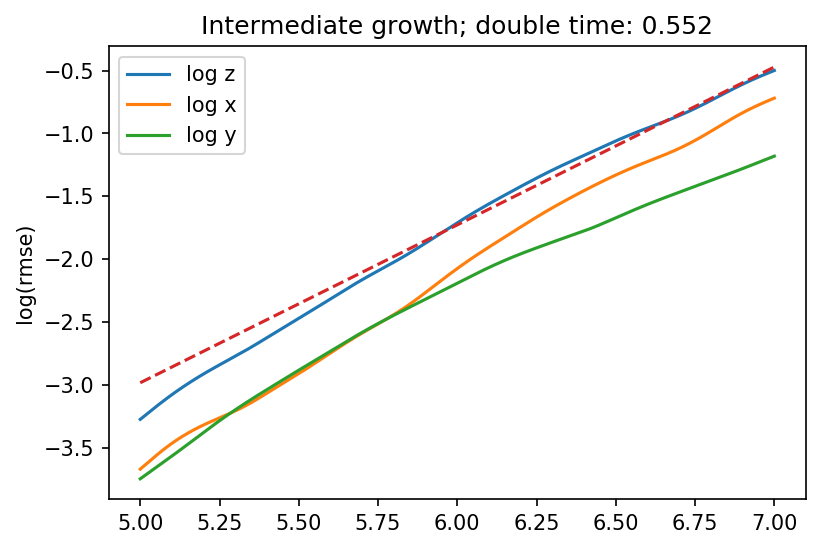

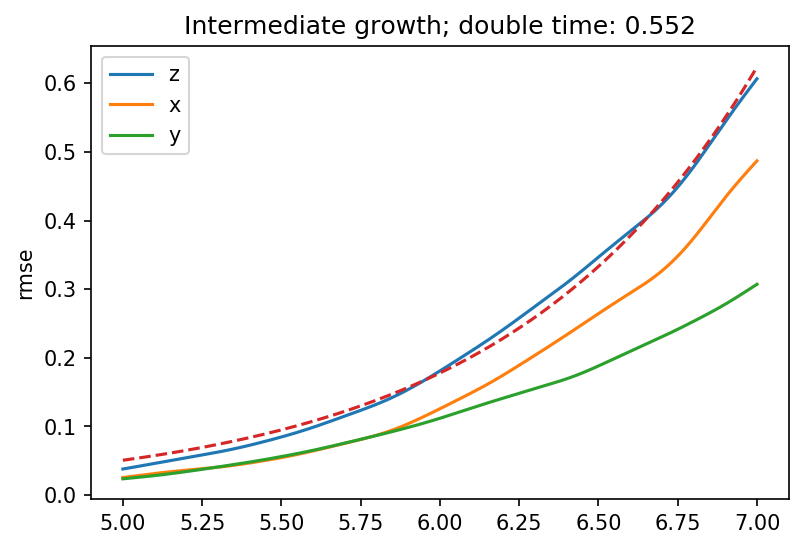

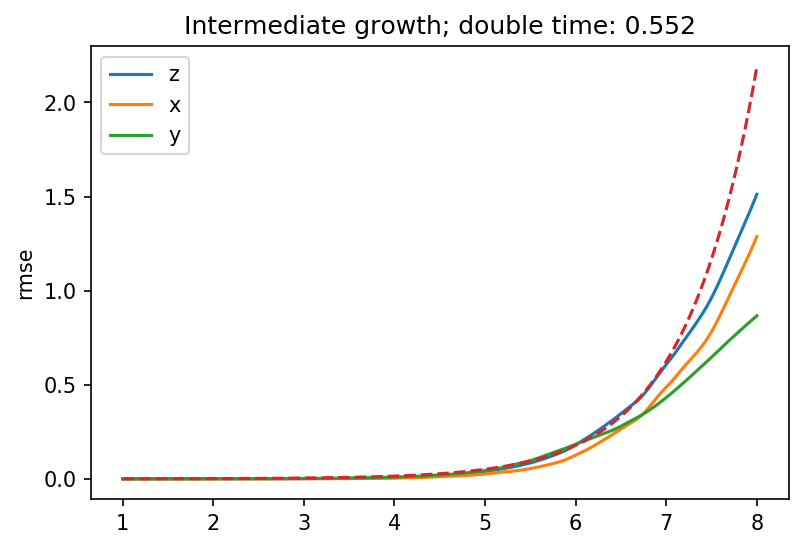

In [41]:
slice_plot = this_growth_slice

fig, ax = plt.subplots(nrows=1, sharex=True, dpi=150)
ax.plot(t_gt[slice_plot], log_Z_C[slice_plot], color='C0')
ax.plot(t_gt[slice_plot], log_X_C[slice_plot], color='C1')
ax.plot(t_gt[slice_plot], log_Y_C[slice_plot], color='C2')
ax.plot(t_gt[slice_plot],
        np.log(Xc_ave_rmse_Cest[slice_plot]),
        color='C3', linestyle='--')
ax.legend(['log z', 'log x', 'log y'])
ax.set_ylabel('log(rmse)')
ax.set_title(f'Intermediate growth; double time: {double_x:0.3}')

fig, ax = plt.subplots(nrows=1, sharex=True, dpi=150)
ax.plot(t_gt[slice_plot], Zc_ave_rmse_C[slice_plot], color='C0')
ax.plot(t_gt[slice_plot], Xc_ave_rmse_C[slice_plot], color='C1')
ax.plot(t_gt[slice_plot], Yc_ave_rmse_C[slice_plot], color='C2')
ax.plot(t_gt[slice_plot],
        Xc_ave_rmse_Cest[slice_plot],
        color='C3', linestyle='--')
ax.legend(['z', 'x', 'y'])
ax.set_ylabel('rmse')
ax.set_title(f'Intermediate growth; double time: {double_x:0.3}')

time0 = 1
time1 = 8

start = np.abs(t_gt - time0).argmin()
stop = np.abs(t_gt - time1).argmin()
slice_plot = slice(start, stop + 1)

fig, ax = plt.subplots(nrows=1, sharex=True, dpi=150)
ax.plot(t_gt[slice_plot], Zc_ave_rmse_C[slice_plot], color='C0')
ax.plot(t_gt[slice_plot], Xc_ave_rmse_C[slice_plot], color='C1')
ax.plot(t_gt[slice_plot], Yc_ave_rmse_I[slice_plot], color='C2')
ax.plot(t_gt[slice_plot],
        Xc_ave_rmse_Cest[slice_plot],
        color='C3', linestyle='--')
ax.legend(['z', 'x', 'y'])
ax.set_ylabel('rmse')
ax.set_title(f'Intermediate growth; double time: {double_x:0.3}')

In [42]:
slice_plot = this_growth_slice

dt = 0.05

r_max = (Zc_ave_rmse_I[slice_plot].max()
     / ((np.exp(D_log_Z_I[slice_plot].min() * dt) + 1)**2 - 1))

r_min = (Zc_ave_rmse_I[slice_plot].min()
     / ((np.exp(D_log_Z_I[slice_plot].max() * dt) + 1)**2 - 1))

r_mid = (Zc_ave_rmse_I[slice_plot].mean()
     / ((np.exp(D_log_Z_I[slice_plot].mean() * dt) + 1)**2 - 1))

print(f'r max (dt: {dt}):   {r_max:0.3}')
print(f'r min (dt: {dt}):   {r_min:0.3}')
# print(f'r mid (dt: {dt}):   {((r_max + r_min)/2):0.3}')
print(f'r mid (dt: {dt}):   {r_mid:0.3}')

print(f'std max (dt: {dt}): {np.sqrt(r_max):0.3}')
print(f'std min (dt: {dt}): {np.sqrt(r_min):0.3}')
# print(f'std mid (dt: {dt}): {(np.sqrt((r_max + r_min)/2)):0.3}')
print(f'std mid (dt: {dt}): {np.sqrt(r_mid):0.3}')

print()
dt = 0.005

r_max = (Zc_ave_rmse_I[slice_plot].max()
     / ((np.exp(D_log_Z_I[slice_plot].min() * dt) + 1)**2 - 1))

r_min = (Zc_ave_rmse_I[slice_plot].min()
     / ((np.exp(D_log_Z_I[slice_plot].max() * dt) + 1)**2 - 1))

r_mid = (Zc_ave_rmse_I[slice_plot].mean()
     / ((np.exp(D_log_Z_I[slice_plot].mean() * dt) + 1)**2 - 1))

print(f'r max (dt: {dt}):   {r_max:0.3}')
print(f'r min (dt: {dt}):   {r_min:0.3}')
# print(f'r mid (dt: {dt}):   {((r_max + r_min)/2):0.3}')
print(f'r mid (dt: {dt}):   {r_mid:0.3}')

print(f'std max (dt: {dt}): {np.sqrt(r_max):0.3}')
print(f'std min (dt: {dt}): {np.sqrt(r_min):0.3}')
# print(f'std mid (dt: {dt}): {(np.sqrt((r_max + r_min)/2)):0.3}')
print(f'std mid (dt: {dt}): {np.sqrt(r_mid):0.3}')


print()
dt = 0.5

r_max = (Zc_ave_rmse_I[slice_plot].max()
     / ((np.exp(D_log_Z_I[slice_plot].min() * dt) + 1)**2 - 1))

r_min = (Zc_ave_rmse_I[slice_plot].min()
     / ((np.exp(D_log_Z_I[slice_plot].max() * dt) + 1)**2 - 1))

r_mid = (Zc_ave_rmse_I[slice_plot].mean()
     / ((np.exp(D_log_Z_I[slice_plot].mean() * dt) + 1)**2 - 1))

print(f'r max (dt: {dt}):   {r_max:0.3}')
print(f'r min (dt: {dt}):   {r_min:0.3}')
# print(f'r mid (dt: {dt}):   {((r_max + r_min)/2):0.3}')
print(f'r mid (dt: {dt}):   {r_mid:0.3}')

print(f'std max (dt: {dt}): {np.sqrt(r_max):0.3}')
print(f'std min (dt: {dt}): {np.sqrt(r_min):0.3}')
# print(f'std mid (dt: {dt}): {(np.sqrt((r_max + r_min)/2)):0.3}')
print(f'std mid (dt: {dt}): {np.sqrt(r_mid):0.3}')

r max (dt: 0.05):   0.281
r min (dt: 0.05):   0.0186
r mid (dt: 0.05):   0.106
std max (dt: 0.05): 0.53
std min (dt: 0.05): 0.136
std mid (dt: 0.05): 0.325

r max (dt: 0.005):   0.297
r min (dt: 0.005):   0.0206
r mid (dt: 0.005):   0.115
std max (dt: 0.005): 0.545
std min (dt: 0.005): 0.144
std mid (dt: 0.005): 0.339

r max (dt: 0.5):   0.158
r min (dt: 0.5):   0.00629
r mid (dt: 0.5):   0.0452
std max (dt: 0.5): 0.398
std min (dt: 0.5): 0.0793
std mid (dt: 0.5): 0.213


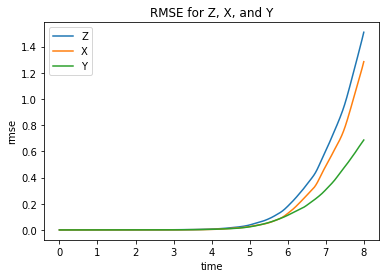

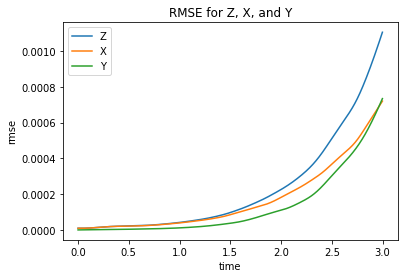

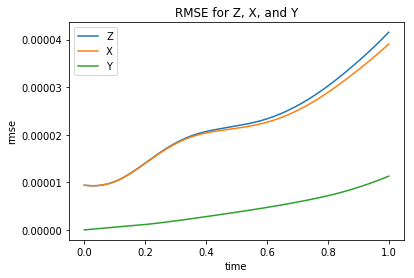

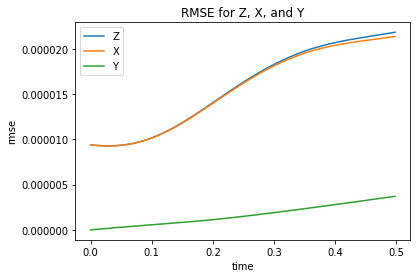

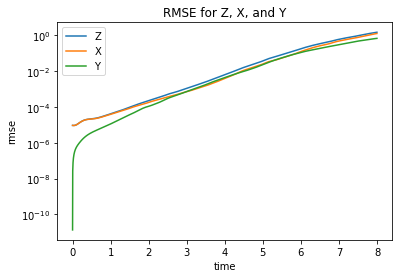

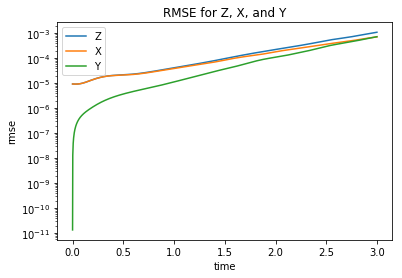

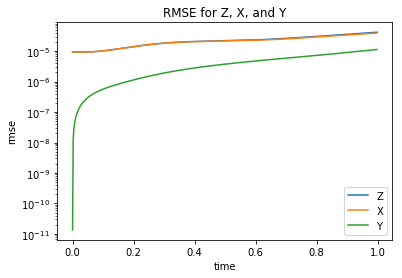

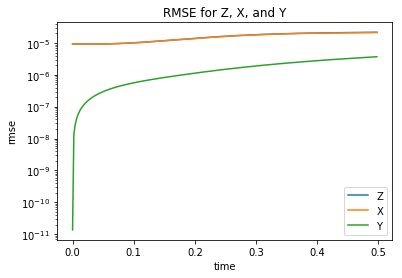

In [43]:
time = 8
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.plot(t_gt[:this_index], Zc_ave_rmse_C[:this_index])
plt.plot(t_gt[:this_index], Xc_ave_rmse_C[:this_index])
plt.plot(t_gt[:this_index], Yc_ave_rmse_C[:this_index])
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z', 'X', 'Y'])

time = 3
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.plot(t_gt[:this_index], Zc_ave_rmse_C[:this_index])
plt.plot(t_gt[:this_index], Xc_ave_rmse_C[:this_index])
plt.plot(t_gt[:this_index], Yc_ave_rmse_C[:this_index])
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z', 'X', 'Y'])

time = 1
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.plot(t_gt[:this_index], Zc_ave_rmse_C[:this_index])
plt.plot(t_gt[:this_index], Xc_ave_rmse_C[:this_index])
plt.plot(t_gt[:this_index], Yc_ave_rmse_C[:this_index])
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z', 'X', 'Y'])

time = 0.5
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.plot(t_gt[:this_index], Zc_ave_rmse_C[:this_index])
plt.plot(t_gt[:this_index], Xc_ave_rmse_C[:this_index])
plt.plot(t_gt[:this_index], Yc_ave_rmse_C[:this_index])
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z', 'X', 'Y'])

time = 8
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.semilogy(t_gt[:this_index], Zc_ave_rmse_C[:this_index])
plt.semilogy(t_gt[:this_index], Xc_ave_rmse_C[:this_index])
plt.semilogy(t_gt[:this_index], Yc_ave_rmse_C[:this_index])
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z', 'X', 'Y'])

time = 3
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.semilogy(t_gt[:this_index], Zc_ave_rmse_C[:this_index])
plt.semilogy(t_gt[:this_index], Xc_ave_rmse_C[:this_index])
plt.semilogy(t_gt[:this_index], Yc_ave_rmse_C[:this_index])
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z', 'X', 'Y'])

time = 1
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.semilogy(t_gt[:this_index], Zc_ave_rmse_C[:this_index])
plt.semilogy(t_gt[:this_index], Xc_ave_rmse_C[:this_index])
plt.semilogy(t_gt[:this_index], Yc_ave_rmse_C[:this_index])
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z', 'X', 'Y'])

time = 0.5
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.semilogy(t_gt[:this_index], Zc_ave_rmse_C[:this_index])
plt.semilogy(t_gt[:this_index], Xc_ave_rmse_C[:this_index])
plt.semilogy(t_gt[:this_index], Yc_ave_rmse_C[:this_index])
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z', 'X', 'Y'])

Text(0.5, 1.0, 'RMSE for Y')

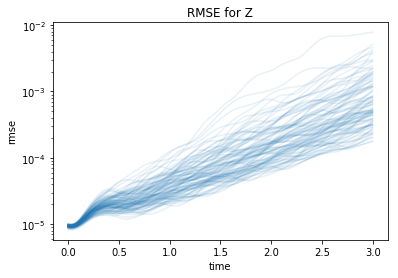

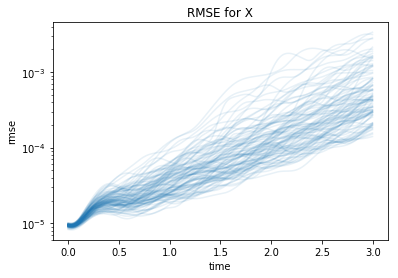

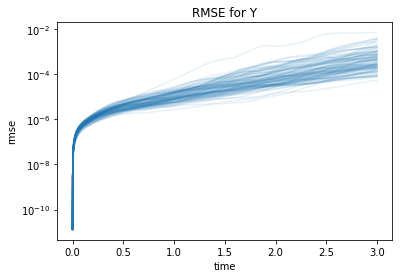

In [44]:
time = 3
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.semilogy(t_gt[:this_index], Z_ave_rmse_C[:, :this_index].T, color='C0', alpha=0.1)
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z')

time = 3
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.semilogy(t_gt[:this_index], X_ave_rmse_C[:, :this_index].T, color='C0', alpha=0.1)
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for X')

time = 3
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.semilogy(t_gt[:this_index], Y_ave_rmse_C[:, :this_index].T, color='C0', alpha=0.1)
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Y')